# Imports

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Configuration
base_dir = Path("/zdata/user-data/noam/data/p2cs/")
full_genomes_dir = base_dir / "full_genomes_new"
organism_merged_genomes_dir = base_dir / "organism_merged_genomes_new"
genome_analysis_dir = base_dir / "genome_analysis_results"
mash_analysis_dir = base_dir / "mash_analysis"
data_dir = mash_analysis_dir / "distance_matrices"  # For genome-level matrices
taxonomy_dir = base_dir / "taxonomy"
k_values = [11, 15, 19, 21]

# Load Genome Analysis Data

In [3]:
# Load genome analysis statistics
individual_stats_df = pd.read_csv(genome_analysis_dir / "individual_genome_statistics.csv", index_col=0)
merged_stats_df = pd.read_csv(genome_analysis_dir / "merged_genome_statistics.csv", index_col=0)
organism_summary_df = pd.read_csv(genome_analysis_dir / "organism_summary_statistics.csv")
organism_taxonomy_df = pd.read_csv(taxonomy_dir / "organism_taxonomy.csv")

In [4]:
organism_taxonomy_df.head()

,organism_name,taxonomy_id,scientific_name,common_name,superkingdom,kingdom,phylum,class,order,family,genus,species,subspecies,strain,lineage_string,found
0,Actinobacillus_pleuropneumoniae_serovar_5b_str...,416269.0,Actinobacillus pleuropneumoniae serovar 5b str...,NaN,cellular organisms,Pseudomonadati,Pseudomonadota,Gammaproteobacteria,Pasteurellales,Pasteurellaceae,Actinobacillus,Actinobacillus pleuropneumoniae,NaN,serovar 5b str. L20,cellular organisms; Bacteria; Pseudomonadati; ...,True
1,Asticcacaulis_excentricus_CB_48,573065.0,Asticcacaulis excentricus CB 48,NaN,cellular organisms,Pseudomonadati,Pseudomonadota,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Asticcacaulis,Asticcacaulis excentricus,NaN,CB 48,cellular organisms; Bacteria; Pseudomonadati; ...,True
2,Gardnerella_vaginalis_409-05,553190.0,Gardnerella vaginalis 409-05,NaN,cellular organisms,Bacillati,Actinomycetota,Actinomycetes,Bifidobacteriales,Bifidobacteriaceae,Gardnerella,Gardnerella vaginalis,409-05,NaN,cellular organisms; Bacteria; Bacillati; Actin...,True
3,Microcystis_aeruginosa_NIES-843,449447.0,Microcystis aeruginosa NIES-843,NaN,cellular organisms,Bacillati,Cyanobacteriota,Cyanophyceae,Chroococcales,Microcystaceae,Microcystis,Microcystis aeruginosa,NIES-843,NaN,cellular organisms; Bacteria; Bacillati; Cyano...,True
4,Clostridium_botulinum_A2_str._Kyoto,536232.0,Clostridium botulinum A2 str. Kyoto,NaN,cellular organisms,Bacillati,Bacillota,Clostridia,Eubacteriales,Clostridiaceae,Clostridium,Clostridium botulinum,NaN,A2 str. Kyoto,cellular organisms; Bacteria; Bacillati; Bacil...,True


In [5]:
individual_stats_df.describe()

,file_size_bytes,total_sequence_length,sequence_count,average_sequence_length
count,7.430000e+03,7.430000e+03,7430.0,7.430000e+03
mean,1.301929e+06,1.283495e+06,1.0,1.283495e+06
std,1.912182e+06,1.885267e+06,0.0,1.885267e+06
min,1.270000e+02,2.800000e+01,1.0,2.800000e+01
25%,1.649000e+03,1.513000e+03,1.0,1.513000e+03
50%,8.679500e+04,8.547300e+04,1.0,8.547300e+04
75%,2.338570e+06,2.305554e+06,1.0,2.305554e+06
max,1.499336e+07,1.478212e+07,1.0,1.478212e+07


In [6]:
merged_stats_df.describe()

,file_size_bytes,total_sequence_length,sequence_count,average_sequence_length
count,2.147000e+03,2.147000e+03,2147.000000,2.147000e+03
mean,4.516370e+06,4.441717e+06,3.460643,2.928388e+06
std,4.631094e+06,4.555135e+06,5.601700,1.917382e+06
min,1.614000e+03,8.100000e+02,1.000000,1.334211e+02
25%,2.072360e+06,2.038271e+06,1.000000,1.663017e+06
50%,3.348500e+06,3.293456e+06,1.000000,2.562277e+06
75%,5.283240e+06,5.196332e+06,2.000000,4.193073e+06
max,5.810100e+07,5.714733e+07,20.000000,1.478212e+07


In [7]:
organism_summary_df.describe()

,individual_file_count,individual_total_length,individual_sequence_count,merged_total_length,merged_sequence_count,merged_file_size
count,2147.000000,2.147000e+03,2147.000000,2.147000e+03,2147.000000,2.147000e+03
mean,3.460643,4.441717e+06,3.460643,4.441717e+06,3.460643,4.516370e+06
std,5.601700,4.555135e+06,5.601700,4.555135e+06,5.601700,4.631094e+06
min,1.000000,8.100000e+02,1.000000,8.100000e+02,1.000000,1.614000e+03
25%,1.000000,2.038271e+06,1.000000,2.038271e+06,1.000000,2.072360e+06
50%,1.000000,3.293456e+06,1.000000,3.293456e+06,1.000000,3.348500e+06
75%,2.000000,5.196332e+06,2.000000,5.196332e+06,2.000000,5.283240e+06
max,20.000000,5.714733e+07,20.000000,5.714733e+07,20.000000,5.810100e+07


# Sunburst plot of taxonomic levels

In [11]:
# Define taxonomic levels in hierarchical order
taxonomy_levels = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'subspecies', 'strain']

# Prepare data for sunburst plot
# Build hierarchical structure where each organism contributes to its full taxonomic path
sunburst_records = []

for _, row in organism_taxonomy_df.iterrows():
    # Build the full path from kingdom to deepest level
    path_values = []
    path_ids = []
    
    for i, level in enumerate(taxonomy_levels):
        value = row.get(level, '?')
        # Skip missing or unknown values
        if pd.isna(value) or str(value) == '?' or str(value).strip() == '':
            break
        
        value_str = str(value).strip()
        if value_str:
            # Create unique ID: concatenate all parent levels
            if i == 0:
                current_id = value_str
            else:
                current_id = ' > '.join(path_values + [value_str])
            
            path_values.append(value_str)
            path_ids.append(current_id)
    
    # Only process if we have at least kingdom level
    if len(path_values) > 0:
        # For each level in the path, create a record
        for i, (level, value, path_id) in enumerate(zip(taxonomy_levels[:len(path_values)], path_values, path_ids)):
            parent_id = path_ids[i-1] if i > 0 else ""
            sunburst_records.append({
                'ids': path_id,
                'labels': value,
                'parents': parent_id,
                'level': level
            })

# Convert to DataFrame
sunburst_df = pd.DataFrame(sunburst_records)

# Count organisms at each taxonomic node
# Each organism appears once at each level in its path
# We need to count unique organisms per node
sunburst_counts = sunburst_df.groupby(['ids', 'labels', 'parents', 'level']).size().reset_index(name='count')

# Create sunburst plot
fig = px.sunburst(
    sunburst_counts,
    ids='ids',
    parents='parents',
    values='count',
    names='labels',
    title='Taxonomic Distribution of Organisms (Sunburst Plot)',
    branchvalues='total',
    maxdepth=9  # Show all taxonomic levels
)

# Update layout for better visibility
fig.update_layout(
    width=1000,
    height=1000,
    font_size=12
)

# Make plot non-interactive (static)
fig.update_layout(
    dragmode=False,  # Disable dragging
    hovermode=False  # Disable hover
)

# Save plot (try PNG first, fallback to HTML)
# PNG export requires kaleido with a working browser
try:
    fig.write_image("sunburst_taxonomic_distribution.png", format='png', width=3000, height=3000, scale=1)
    print("✓ Image saved successfully as 'sunburst_taxonomic_distribution.png'")
except Exception as e:
    error_msg = str(e)
    if "browser" in error_msg.lower() or "chrome" in error_msg.lower() or "chromium" in error_msg.lower():
        print("⚠ Could not save PNG image (browser issue with kaleido)")
        print("  Kaleido requires a working Chrome/Chromium browser.")
        print("  You can try: choreo_get_chrome")
        print("  Or use the HTML export below (no browser needed)")
    else:
        print(f"⚠ Could not save PNG image: {error_msg}")
        print("  To save PNG images, ensure kaleido is installed: pip install -U kaleido")
    
    # Fallback: save as HTML (always works, no browser needed)
    try:
        fig.write_html("sunburst_taxonomic_distribution.html")
        print("✓ Saved as interactive HTML: 'sunburst_taxonomic_distribution.html'")
        print("  (You can open this file in a web browser and take a screenshot if needed)")
    except Exception as e2:
        print(f"⚠ Could not save HTML either: {e2}")

# Show plot as static (non-interactive)
fig.show(config={'staticPlot': True, 'displayModeBar': False})

# Print summary statistics
print("\nSummary by taxonomic level:")
print("=" * 60)
for level in taxonomy_levels:
    level_data = sunburst_counts[sunburst_counts['level'] == level]
    if len(level_data) > 0:
        total_count = level_data['count'].sum()
        unique_count = len(level_data)
        print(f"{level.capitalize():15s}: {unique_count:5d} unique values, {total_count:6d} total organisms")

Wait expired, Browser is being closed by watchdog.
JSONError decoding message. Ignoring
Traceback (most recent call last):
  File "/zdata/user-data/noam/.conda/envs/python310/lib/python3.10/site-packages/choreographer/channels/_wire.py", line 65, in deserialize
    return simplejson.loads(message)
  File "/zdata/user-data/noam/.conda/envs/python310/lib/python3.10/site-packages/simplejson/__init__.py", line 514, in loads
    return _default_decoder.decode(s)
  File "/zdata/user-data/noam/.conda/envs/python310/lib/python3.10/site-packages/simplejson/decoder.py", line 386, in decode
    obj, end = self.raw_decode(s)
  File "/zdata/user-data/noam/.conda/envs/python310/lib/python3.10/site-packages/simplejson/decoder.py", line 416, in raw_decode
    return self.scan_once(s, idx=_w(s, idx).end())
simplejson.errors.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/zdata/u

⚠ Could not save PNG image (browser issue with kaleido)
  Kaleido requires a working Chrome/Chromium browser.
  You can try: choreo_get_chrome
  Or use the HTML export below (no browser needed)
✓ Saved as interactive HTML: 'sunburst_taxonomic_distribution.html'
  (You can open this file in a web browser and take a screenshot if needed)



Summary by taxonomic level:
Kingdom        :     6 unique values,   2136 total organisms
Phylum         :    38 unique values,   2136 total organisms
Class          :    78 unique values,   2126 total organisms
Order          :   165 unique values,   2122 total organisms
Family         :   336 unique values,   2115 total organisms
Genus          :   671 unique values,   2107 total organisms
Species        :  1025 unique values,   1930 total organisms
Subspecies     :  1042 unique values,   1136 total organisms
Strain         :     2 unique values,      2 total organisms


# Plot Genome Analysis Data

## Histograms

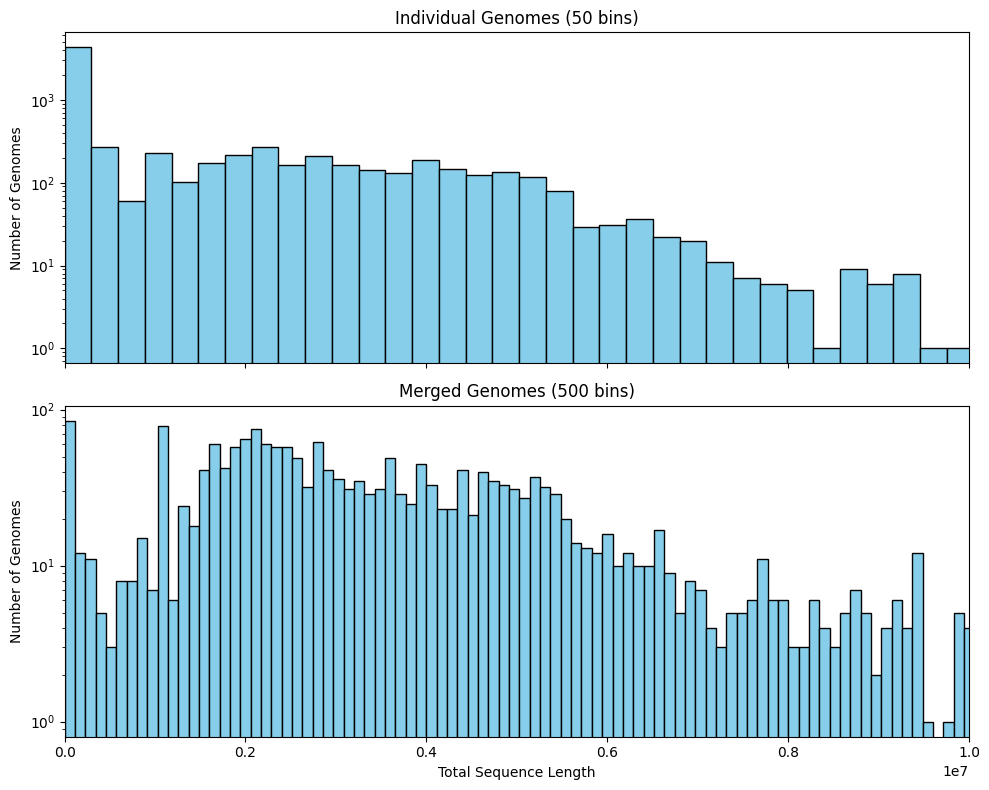

In [31]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Individual Genomes
n_bins_0 = 50
axs[0].hist(individual_stats_df['total_sequence_length'], bins=n_bins_0, color='skyblue', edgecolor='black')
axs[0].set_ylabel('Number of Genomes')
axs[0].set_title(f'Individual Genomes ({n_bins_0} bins)')
axs[0].set_yscale('log')

# Merged Genomes
n_bins_1 = 500
axs[1].hist(merged_stats_df['total_sequence_length'], bins=n_bins_1, color='skyblue', edgecolor='black')
axs[1].set_xlabel('Total Sequence Length')
axs[1].set_xlim(0, 1e7)
axs[1].set_ylabel('Number of Genomes')
axs[1].set_yscale('log')
axs[1].set_title(f'Merged Genomes ({n_bins_1} bins)')

plt.tight_layout()
plt.show()


## Scatter

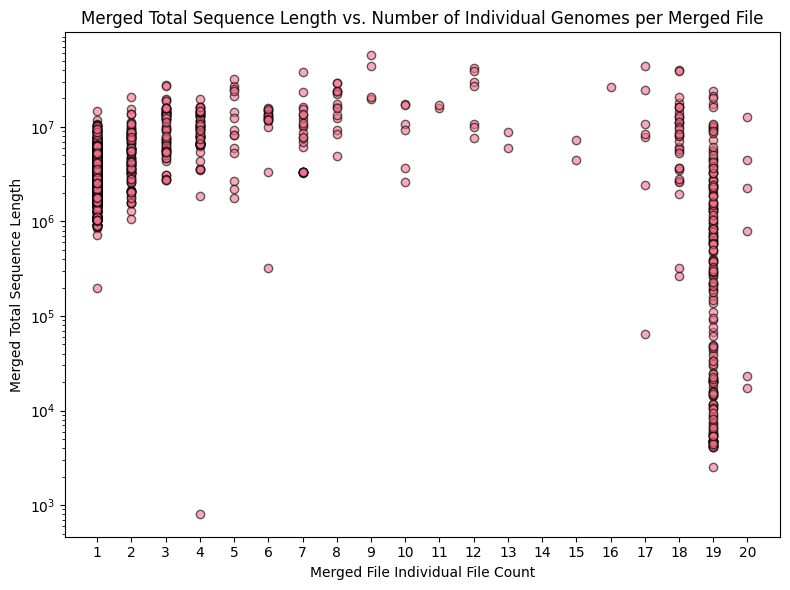

In [8]:
# Scatter plot: merged file individual file count vs. total sequence length (merged)
plt.figure(figsize=(8, 6))
plt.scatter(
    organism_summary_df['individual_file_count'].astype(int), 
    organism_summary_df['merged_total_length'], 
    alpha=0.6, edgecolor='k'
)
plt.xlabel('Merged File Individual File Count')
plt.ylabel('Merged Total Sequence Length')
plt.title('Merged Total Sequence Length vs. Number of Individual Genomes per Merged File')
plt.yscale('log')

# Set integer ticks for x-axis
x_min = int(organism_summary_df['individual_file_count'].min())
x_max = int(organism_summary_df['individual_file_count'].max())
plt.xticks(range(x_min, x_max + 1))

plt.tight_layout()
plt.show()


# Load Distance Data

In [3]:
def load_distance_matrix(file_path):
    """Load and clean a distance matrix from CSV."""
    df = pd.read_csv(file_path, index_col=0)
    
    # Clean the matrix (remove any NaN/inf values)
    df = df.fillna(1.0)  # Fill NaN with maximum distance
    df = df.replace([np.inf, -np.inf], 1.0)  # Replace infinite values
    
    # Ensure matrix is symmetric
    df = (df + df.T) / 2
    
    # Set diagonal to zero (distance from genome to itself)
    np.fill_diagonal(df.values, 0)
    
    return df

def get_matrix_stats(df, matrix_name):
    """Get basic statistics about a distance matrix."""
    # Get upper triangle (excluding diagonal)
    upper_tri = np.triu(df.values, k=1)
    distances = upper_tri[upper_tri > 0]  # Only non-zero distances
    
    stats = {
        'matrix_name': matrix_name,
        'n_genomes': df.shape[0],
        'n_distances': len(distances),
        'mean_distance': np.mean(distances),
        'median_distance': np.median(distances),
        'min_distance': np.min(distances),
        'max_distance': np.max(distances),
        'std_distance': np.std(distances)
    }
    
    return stats

In [4]:
# Load a matrix k15 to check data structure
k15_mat_file = data_dir / "distance_matrix_k15.csv"
if k15_mat_file.exists():
    k15_mat_df = load_distance_matrix(k15_mat_file)
    print(f"\nMatrix (k=15) shape: {k15_mat_df.shape}")
    print(f"Matrix genome names (first 5): {list(k15_mat_df.index[:5])}")
    
    # Show k15 statistics
    stats = get_matrix_stats(k15_mat_df, "k15_genomes")
    print(f"\nK15 statistics:")
    for key, value in stats.items():
        if key != 'matrix_name':
            print(f"  {key}: {value:.4f}" if isinstance(value, float) else f"  {key}: {value}")
else:
    print(f"Sample file not found: {k15_mat_file}")


Matrix (k=15) shape: (2131, 2131)
Matrix genome names (first 5): ['Marinomonas_posidonica_IVIA-Po-181', 'Granulicella_tundricola', 'Arcobacter_butzleri_ED-1', 'Borrelia_miyamotoi_LB-2001', 'Bacillus_cereus_AH820']

K15 statistics:
  n_genomes: 2131
  n_distances: 2269483
  mean_distance: 0.3009
  median_distance: 0.2998
  min_distance: 0.0000
  max_distance: 0.6019
  std_distance: 0.0670


# Distance Distribution Analysis

## Compare K values (old)

In [20]:
# Collect statistics for all matrices
all_stats = []

# Load distance matrices for all k-values
for k in k_values:
    file_path = data_dir / f"distance_matrix_k{k}.csv"
    if file_path.exists():
        try:
            df = load_distance_matrix(file_path)
            stats = get_matrix_stats(df, f"k{k}")
            stats['k_value'] = k
            all_stats.append(stats)
            print(f"Loaded matrix k={k}: {df.shape}")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

# Convert to DataFrame
stats_df = pd.DataFrame(all_stats)
print(f"\nLoaded {len(all_stats)} matrices total")

# Display summary table
print("\nSummary of all matrices:")
display_cols = ['matrix_name', 'n_genomes', 'mean_distance', 'median_distance', 'min_distance', 'max_distance']
print(stats_df[display_cols].to_string(index=False, float_format='%.4f'))

Loaded matrix k=11: (2131, 2131)
Loaded matrix k=15: (2131, 2131)
Loaded matrix k=19: (2131, 2131)
Loaded matrix k=21: (2131, 2131)

Loaded 4 matrices total

Summary of all matrices:
matrix_name  n_genomes  mean_distance  median_distance  min_distance  max_distance
        k11       2131         0.0580           0.0525        0.0000        0.2634
        k15       2131         0.3009           0.2998        0.0000        0.6019
        k19       2131         0.4465           0.4483        0.0000        1.0000
        k21       2131         0.4572           0.4299        0.0000        1.0000


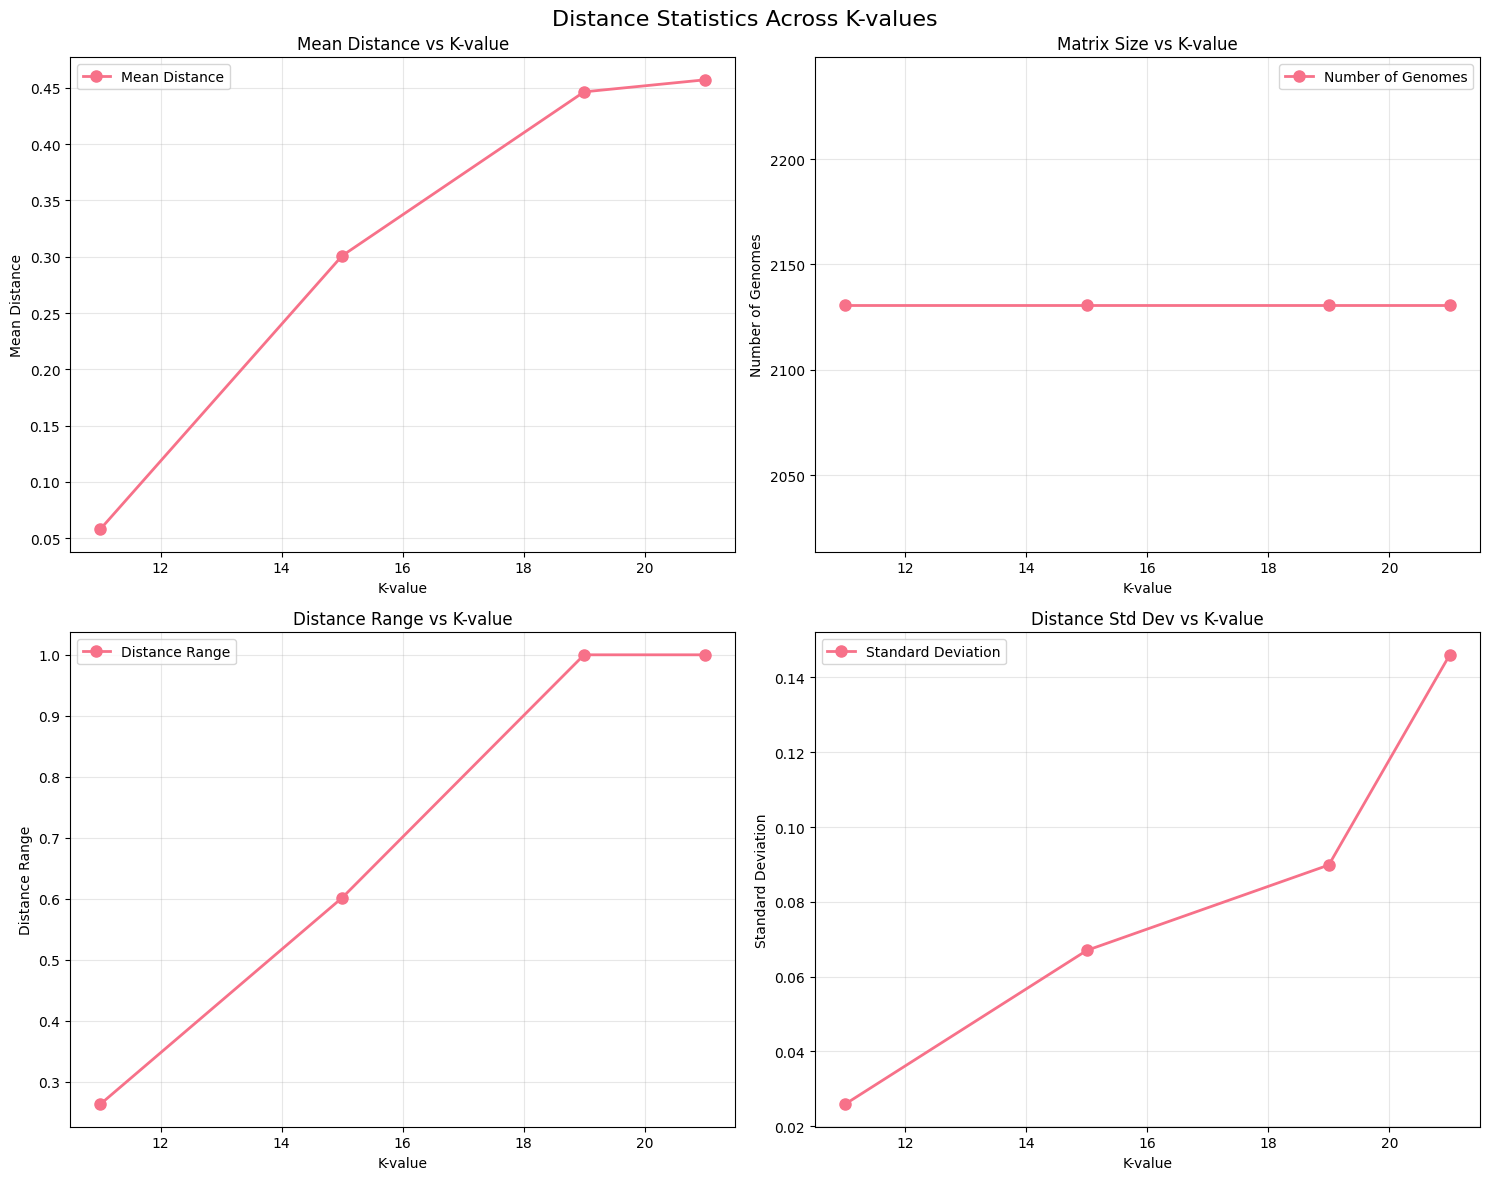

In [21]:
# Plot 1: Distance statistics comparison across k-values
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distance Statistics Across K-values', fontsize=16)

# Subplot 1: Mean distances
ax1 = axes[0, 0]
ax1.plot(stats_df['k_value'], stats_df['mean_distance'], 'o-', label='Mean Distance', linewidth=2, markersize=8)
ax1.set_xlabel('K-value')
ax1.set_ylabel('Mean Distance')
ax1.set_title('Mean Distance vs K-value')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Number of genomes
ax2 = axes[0, 1]
ax2.plot(stats_df['k_value'], stats_df['n_genomes'], 'o-', label='Number of Genomes', linewidth=2, markersize=8)
ax2.set_xlabel('K-value')
ax2.set_ylabel('Number of Genomes')
ax2.set_title('Matrix Size vs K-value')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Subplot 3: Distance range (max - min)
ax3 = axes[1, 0]
distance_range = stats_df['max_distance'] - stats_df['min_distance']
ax3.plot(stats_df['k_value'], distance_range, 'o-', label='Distance Range', linewidth=2, markersize=8)
ax3.set_xlabel('K-value')
ax3.set_ylabel('Distance Range')
ax3.set_title('Distance Range vs K-value')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Subplot 4: Standard deviation
ax4 = axes[1, 1]
ax4.plot(stats_df['k_value'], stats_df['std_distance'], 'o-', label='Standard Deviation', linewidth=2, markersize=8)
ax4.set_xlabel('K-value')
ax4.set_ylabel('Standard Deviation')
ax4.set_title('Distance Std Dev vs K-value')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

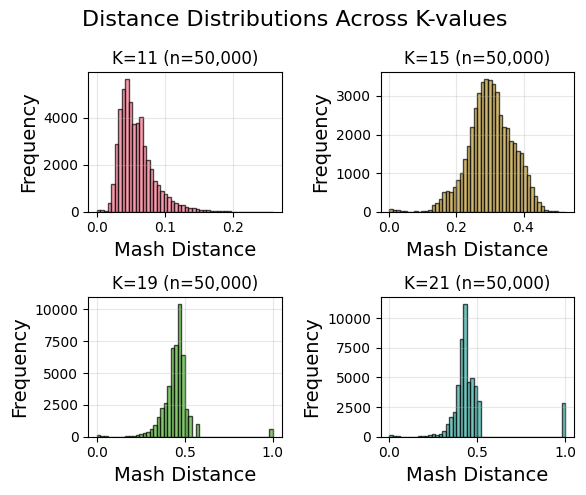

In [13]:
# Plot distance distributions for all k-values
def plot_all_k_distributions(max_samples=50000):
    """Plot distance distributions for all k-values."""
    
    fig, axes = plt.subplots(2, 2, figsize=(6, 5))
    fig.suptitle('Distance Distributions Across K-values', fontsize=16)
    
    for i, k in enumerate(k_values):
        row = i // 2
        col = i % 2
        
        file_path = data_dir / f"distance_matrix_k{k}.csv"
        if file_path.exists():
            df = load_distance_matrix(file_path)
            upper_tri = np.triu(df.values, k=1)
            distances = upper_tri[upper_tri > 0]
            
            # Sample if too many points
            if len(distances) > max_samples:
                distances = np.random.choice(distances, max_samples, replace=False)
            
            axes[row, col].hist(distances, bins=50, alpha=0.7, color=f'C{i}', edgecolor='black')
            axes[row, col].set_title(f'K={k} (n={len(distances):,})')
            axes[row, col].set_xlabel('Mash Distance', fontsize=14)
            axes[row, col].set_ylabel('Frequency', fontsize=14)
            axes[row, col].grid(True, alpha=0.3)
            
            # Add statistics text
            # stats_text = f'Mean: {np.mean(distances):.4f}\nMedian: {np.median(distances):.4f}'
            # axes[row, col].text(0.7, 0.7, stats_text, transform=axes[row, col].transAxes, 
            #                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
            #                    verticalalignment='top')
        else:
            axes[row, col].text(0.5, 0.5, f'No data for k={k}', 
                               ha='center', va='center', transform=axes[row, col].transAxes)
            axes[row, col].set_title(f'K={k}')
    
    plt.tight_layout()

    plt.savefig("distance_distributions_all_k.png", dpi=300)

    plt.show()

# Plot distributions for all k-values
plot_all_k_distributions()

## Histograms

Loading distance matrix...
Calculating mean distances by taxonomic level...
Processing 2,269,515 organism pairs...

Mean distances by taxonomic level (k=15):


,taxonomic_level,k_value,mean_distance,median_distance,std_distance,min_distance,max_distance,n_pairs
0,kingdom,15,0.326283,0.325560,0.058186,0.105324,0.601872,546630
1,phylum,15,0.271338,0.268643,0.061487,0.101635,0.545391,229633
2,class,15,0.264995,0.265973,0.054988,0.088720,0.461897,154915
3,order,15,0.244595,0.247229,0.048493,0.095635,0.521616,46680
4,family,15,0.195968,0.180272,0.061226,0.017252,0.384765,13064
5,genus,15,0.187451,0.218581,0.069444,0.000000,0.367569,14524
6,species,15,0.022573,0.014603,0.029637,0.000000,0.315826,8035
7,subspecies,15,0.018491,0.014577,0.035334,0.000000,0.322320,529
8,strain,15,0.000854,0.000772,0.000855,0.000000,0.002890,16


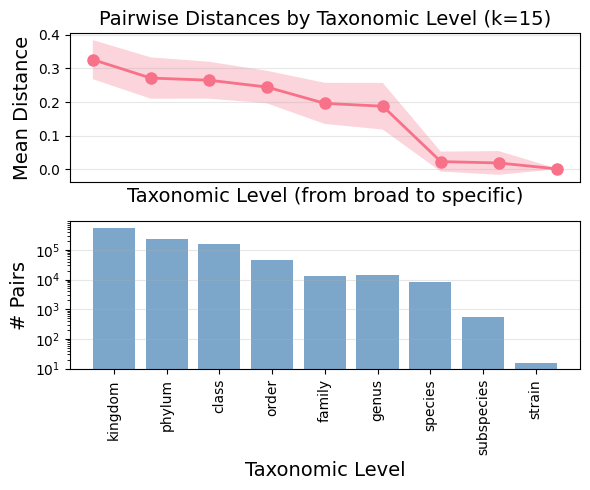


Summary Statistics:

KINGDOM:
  Mean distance: 0.3263
  Median distance: 0.3256
  Std deviation: 0.0582
  Range: [0.1053, 0.6019]
  Number of pairs: 546,630

PHYLUM:
  Mean distance: 0.2713
  Median distance: 0.2686
  Std deviation: 0.0615
  Range: [0.1016, 0.5454]
  Number of pairs: 229,633

CLASS:
  Mean distance: 0.2650
  Median distance: 0.2660
  Std deviation: 0.0550
  Range: [0.0887, 0.4619]
  Number of pairs: 154,915

ORDER:
  Mean distance: 0.2446
  Median distance: 0.2472
  Std deviation: 0.0485
  Range: [0.0956, 0.5216]
  Number of pairs: 46,680

FAMILY:
  Mean distance: 0.1960
  Median distance: 0.1803
  Std deviation: 0.0612
  Range: [0.0173, 0.3848]
  Number of pairs: 13,064

GENUS:
  Mean distance: 0.1875
  Median distance: 0.2186
  Std deviation: 0.0694
  Range: [0.0000, 0.3676]
  Number of pairs: 14,524

SPECIES:
  Mean distance: 0.0226
  Median distance: 0.0146
  Std deviation: 0.0296
  Range: [0.0000, 0.3158]
  Number of pairs: 8,035

SUBSPECIES:
  Mean distance: 0.0

In [15]:
# Calculate mean distance for each taxonomic level
# by averaging distances of organisms whose lowest common ancestor (LCA) is at that level

taxonomy_levels = [
    'kingdom',
    'phylum',
    'class',
    'order',
    'family',
    'genus',
    'species',
    'subspecies',
    'strain'
]
k = 15

def find_lowest_common_ancestor(org1_tax, org2_tax, taxonomy_levels):
    """
    Find the lowest common ancestor (most specific shared taxonomic level) between two organisms.
    
    Parameters:
    -----------
    org1_tax : dict
        Taxonomy dictionary for organism 1
    org2_tax : dict
        Taxonomy dictionary for organism 2
    taxonomy_levels : list
        List of taxonomic levels from least to most specific
        
    Returns:
    --------
    str or None
        The lowest common ancestor taxonomic level, or None if no common ancestor found
    """
    # Start from most specific (strain) and go up to least specific (kingdom)
    for level in reversed(taxonomy_levels):
        val1 = org1_tax.get(level)
        val2 = org2_tax.get(level)
        
        # Check if both have values and they're not NaN and they match
        if (pd.notna(val1) and pd.notna(val2) and 
            str(val1) != '?' and str(val2) != '?' and
            str(val1) == str(val2)):
            return level
    return None

def calculate_mean_distances_by_taxonomy_level(distance_matrix, taxonomy_df, taxonomy_levels, k_value=15):
    """
    Calculate mean distance for each taxonomic level by grouping organism pairs
    by their lowest common ancestor.
    
    Parameters:
    -----------
    distance_matrix : pd.DataFrame
        Distance matrix with organism names as index and columns
    taxonomy_df : pd.DataFrame
        Taxonomy dataframe with organism_name and taxonomic levels as columns
    taxonomy_levels : list
        List of taxonomic levels
    k_value : int
        K value for the distance matrix (for reference)
        
    Returns:
    --------
    pd.DataFrame
        DataFrame with mean distances for each taxonomic level
    """
    # Set up taxonomy lookup
    if 'organism_name' not in taxonomy_df.columns:
        raise ValueError("taxonomy_df must have 'organism_name' column")
    
    taxonomy_lookup = taxonomy_df.set_index('organism_name')
    
    # Get all organism names from distance matrix
    org_names = list(distance_matrix.index)
    
    # Build taxonomy dictionaries for all organisms (pre-process for efficiency)
    org_taxonomies = {}
    taxonomy_fallback = {}  # For fallback matching
    
    # Pre-build fallback mapping
    for idx in taxonomy_lookup.index:
        normalized_key = str(idx).replace("_", " ")
        if normalized_key not in taxonomy_fallback:
            taxonomy_fallback[normalized_key] = idx
    
    for org in org_names:
        if org in taxonomy_lookup.index:
            row = taxonomy_lookup.loc[org]
            org_taxonomies[org] = {level: row.get(level, '?') for level in taxonomy_levels}
        else:
            # Try fallback matching
            org_normalized = org.replace("_", " ")
            if org_normalized in taxonomy_fallback:
                matching_org = taxonomy_fallback[org_normalized]
                row = taxonomy_lookup.loc[matching_org]
                org_taxonomies[org] = {level: row.get(level, '?') for level in taxonomy_levels}
            else:
                org_taxonomies[org] = {level: '?' for level in taxonomy_levels}
    
    # Group pairs by their lowest common ancestor level
    distances_by_lca = {level: [] for level in taxonomy_levels}
    
    # Iterate through all pairs (upper triangle only, excluding diagonal)
    n_orgs = len(org_names)
    total_pairs = n_orgs * (n_orgs - 1) // 2
    
    print(f"Processing {total_pairs:,} organism pairs...")
    
    for i in range(n_orgs):
        org1 = org_names[i]
        org1_tax = org_taxonomies[org1]
        
        for j in range(i + 1, n_orgs):  # Upper triangle only
            org2 = org_names[j]
            org2_tax = org_taxonomies[org2]
            
            # Get distance
            dist = distance_matrix.loc[org1, org2]
            
            # Find lowest common ancestor
            lca_level = find_lowest_common_ancestor(org1_tax, org2_tax, taxonomy_levels)
            
            if lca_level is not None:
                distances_by_lca[lca_level].append(dist)
    
    # Calculate mean distances for each taxonomic level
    results = []
    for level in taxonomy_levels:
        distances = distances_by_lca[level]
        if len(distances) > 0:
            mean_dist = np.mean(distances)
            median_dist = np.median(distances)
            std_dist = np.std(distances)
            min_dist = np.min(distances)
            max_dist = np.max(distances)
            n_pairs = len(distances)
        else:
            mean_dist = np.nan
            median_dist = np.nan
            std_dist = np.nan
            min_dist = np.nan
            max_dist = np.nan
            n_pairs = 0
        
        results.append({
            'taxonomic_level': level,
            'k_value': k_value,
            'mean_distance': mean_dist,
            'median_distance': median_dist,
            'std_distance': std_dist,
            'min_distance': min_dist,
            'max_distance': max_dist,
            'n_pairs': n_pairs
        })
    
    return pd.DataFrame(results)

# Load distance matrix and calculate mean distances by taxonomy level
print("Loading distance matrix...")
distance_matrix = load_distance_matrix(data_dir / f"distance_matrix_k{k}.csv")

print("Calculating mean distances by taxonomic level...")
mean_taxonomic_distances = calculate_mean_distances_by_taxonomy_level(
    distance_matrix, 
    organism_taxonomy_df, 
    taxonomy_levels,
    k_value=k
)

print(f"\nMean distances by taxonomic level (k={k}):")
print("=" * 80)
display(mean_taxonomic_distances)

# Visualize the results
fig, axes = plt.subplots(2, 1, figsize=(6, 5))

# Plot 1: Mean distance by taxonomic level
ax1 = axes[0]
tax_order = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'subspecies', 'strain']
results_ordered = mean_taxonomic_distances.set_index('taxonomic_level').loc[tax_order]

ax1.plot(results_ordered.index, results_ordered['mean_distance'], 'o-', linewidth=2, markersize=8)
ax1.fill_between(results_ordered.index, 
                 results_ordered['mean_distance'] - results_ordered['std_distance'],
                 results_ordered['mean_distance'] + results_ordered['std_distance'],
                 alpha=0.3)
ax1.set_xlabel('Taxonomic Level (from broad to specific)', fontsize=14)
ax1.set_ylabel('Mean Distance', fontsize=14)
ax1.set_title(f'Pairwise Distances by Taxonomic Level (k={k})', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.set_xticks([])

# Plot 2: Number of pairs by taxonomic level
ax2 = axes[1]
ax2.bar(results_ordered.index, results_ordered['n_pairs'], alpha=0.7, color='steelblue')
ax2.set_xlabel('Taxonomic Level', fontsize=14)
ax2.set_ylabel('# Pairs', fontsize=14)
# ax2.set_title('Number of Pairs Grouped by Lowest Common Ancestor Level', fontsize=14)
ax2.grid(True, alpha=0.3, axis='y')
ax2.tick_params(axis='x', rotation=90)
ax2.set_yscale('log')

plt.tight_layout()

plt.savefig("mean_distance_by_taxonomic_level.png", dpi=300)

plt.show()

# Print summary statistics
print("\n" + "=" * 80)
print("Summary Statistics:")
print("=" * 80)
for _, row in mean_taxonomic_distances.iterrows():
    if row['n_pairs'] > 0:
        print(f"\n{row['taxonomic_level'].upper()}:")
        print(f"  Mean distance: {row['mean_distance']:.4f}")
        print(f"  Median distance: {row['median_distance']:.4f}")
        print(f"  Std deviation: {row['std_distance']:.4f}")
        print(f"  Range: [{row['min_distance']:.4f}, {row['max_distance']:.4f}]")
        print(f"  Number of pairs: {row['n_pairs']:,}")



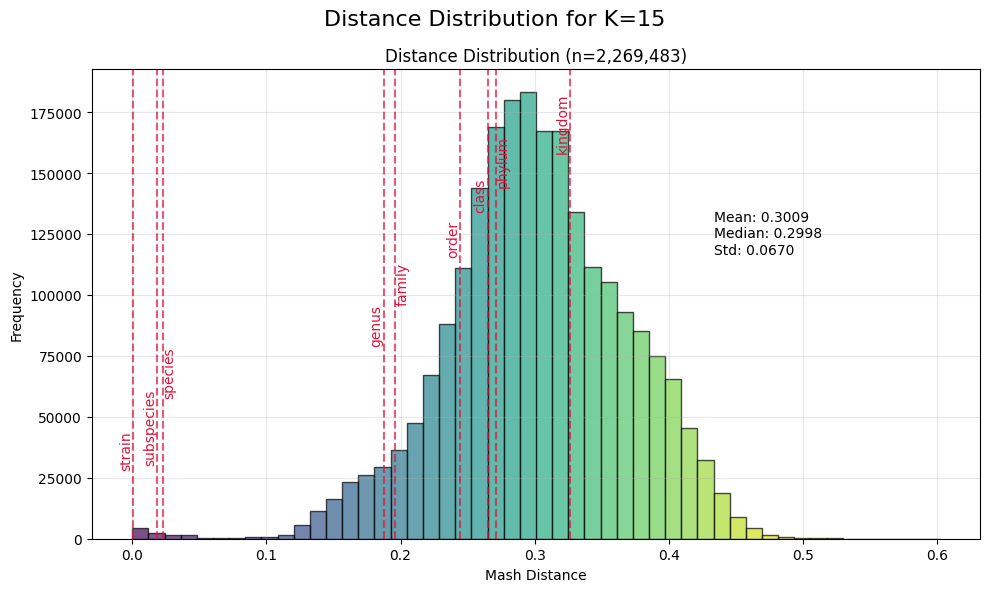

In [71]:
# Plot 2: Distance distribution histograms with taxon level markers
def plot_distance_distributions_with_taxon_marks(k_value=15, max_samples=np.inf, taxon_stats=None):
    """Plot distance distributions for a specific k-value, 
       and mark taxonomic level means from mean_taxonomic_distances."""
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    fig.suptitle(f'Distance Distribution for K={k_value}', fontsize=16)
    
    # Load and plot distance data
    file_path = data_dir / f"distance_matrix_k{k_value}.csv"
    if not file_path.exists():
        ax.text(0.5, 0.5, f'No data found for k={k_value}', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'Distance Distribution for K={k_value}')
        plt.tight_layout()
        plt.show()
        return
    
    df = load_distance_matrix(file_path)
    upper_tri = np.triu(df.values, k=1)
    distances = upper_tri[upper_tri > 0]
    
    # Get normalization range that matches seaborn heatmap exactly
    # Cap colors at 0.5 - values >= 0.5 will all map to the maximum color
    matrix_values = df.values
    vmin = matrix_values.min()
    vmax = 0.5  # Cap colors at 0.5
    
    # Sample if too many points (for plotting efficiency)
    if len(distances) > max_samples:
        distances = np.random.choice(distances, max_samples, replace=False)
    
    # Plot histogram with colors matching heatmap colormap
    n, bins, patches = ax.hist(distances, bins=50, alpha=0.7, edgecolor='black')
    
    # Color bars using viridis colormap (same as heatmap)
    from matplotlib.colors import Normalize
    from matplotlib.cm import get_cmap
    
    cmap = get_cmap('viridis')
    # Normalize using the exact same range as seaborn heatmap
    # This ensures distance values map to the same colors in both plots
    norm = Normalize(vmin=vmin, vmax=vmax)
    
    # Color each bar based on its midpoint distance value
    for i, patch in enumerate(patches):
        midpoint = (bins[i] + bins[i+1]) / 2
        color = cmap(norm(midpoint))
        patch.set_facecolor(color)
    
    ax.set_title(f'Distance Distribution (n={len(distances):,})')
    ax.set_xlabel('Mash Distance')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)
    
    # Add statistics text
    stats_text = f'Mean: {np.mean(distances):.4f}\nMedian: {np.median(distances):.4f}\nStd: {np.std(distances):.4f}'
    ax.text(0.7, 0.7, stats_text, transform=ax.transAxes, verticalalignment='top')
    
    # Plot taxonomic level markers if provided
    if taxon_stats is not None:
        _plot_taxonomy_markers(ax, taxon_stats, k_value)
    
    plt.tight_layout()
    plt.show()


def _plot_taxonomy_markers(ax, taxon_stats, k_value):
    """Helper function to plot vertical lines and labels for taxonomic levels."""
    
    # Filter and order taxonomy data
    taxon_stats_plot = taxon_stats[taxon_stats['k_value'] == k_value] if 'k_value' in taxon_stats.columns else taxon_stats
    
    canonical_order = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'subspecies', 'strain']
    if all(level in canonical_order for level in taxon_stats_plot['taxonomic_level'].unique()):
        taxon_stats_plot = taxon_stats_plot.set_index('taxonomic_level').loc[
            [tl for tl in canonical_order if tl in taxon_stats_plot['taxonomic_level'].values]
        ].reset_index()
    
    # Extract data arrays
    n_marks = len(taxon_stats_plot)
    mean_distances = taxon_stats_plot['mean_distance'].values
    levels = taxon_stats_plot['taxonomic_level'].values
    
    # Detect adjacent pairs and determine text alignment
    pair_positions = _detect_adjacent_pairs(mean_distances)
    
    # Calculate y positions to prevent vertical overlap
    ylims = ax.get_ylim()
    y_positions = _calculate_y_positions(n_marks, ylims)
    
    # Plot vertical lines and labels
    for i, (mu, level) in enumerate(zip(mean_distances, levels)):
        ax.axvline(mu, color='crimson', linestyle='--', alpha=0.7)
        
        # Determine text alignment: left pair -> right align, right pair -> left align, else -> right align
        ha_align = 'right' if pair_positions[i] != 2 else 'left'
        y_height = y_positions[i] if i < len(y_positions) else ylims[1] * (0.92 - i * 0.08)
        
        ax.text(mu, y_height, level, color='crimson', fontsize=10, rotation=90, 
                ha=ha_align, va='top')


def _detect_adjacent_pairs(mean_distances, threshold=0.009):
    """
    Detect adjacent pairs of lines and return position codes.
    Returns: list where 1 = first in pair (left), 2 = second in pair (right), 0 = not in pair
    """
    n = len(mean_distances)
    pair_positions = [0] * n
    
    for i in range(n - 1):
        if abs(mean_distances[i+1] - mean_distances[i]) < threshold:
            # Assign based on x-position: lower x = first (left), higher x = second (right)
            if mean_distances[i] <= mean_distances[i+1]:
                pair_positions[i] = 1
                pair_positions[i+1] = 2
            else:
                pair_positions[i+1] = 1
                pair_positions[i] = 2
    
    return pair_positions


def _calculate_y_positions(n_marks, ylims):
    """Calculate y-positions for text labels to prevent vertical overlap."""
    if n_marks == 1:
        return [ylims[1] * 0.92]
    
    y_range = ylims[1] - ylims[0]
    text_height = y_range * 0.06
    spacing = max(text_height * 1.5, y_range * 0.08)
    
    y_positions = []
    current_y = ylims[1] * 0.95
    bottom_limit = ylims[0] + y_range * 0.15
    
    for i in range(n_marks):
        y_positions.append(current_y)
        current_y -= spacing
        
        # Redistribute remaining labels if we run out of space
        if current_y < bottom_limit and i < n_marks - 1:
            remaining = n_marks - i - 1
            available_space = current_y - bottom_limit
            spacing = available_space / (remaining + 1)
            for j in range(remaining):
                current_y = bottom_limit + (remaining - j) * spacing
                y_positions.append(current_y)
            break
    
    return y_positions


# Plot distributions for k=15, using mean_taxonomic_distances for markers
plot_distance_distributions_with_taxon_marks(k_value=15, taxon_stats=mean_taxonomic_distances)

In [92]:
# Plot histogram of distances for organisms that are at least in the same family
# (or closer: genus, species, subspecies, strain)
# First, identify organism pairs (invariant to k), then plot for multiple k values

def get_organism_pairs_same_family_or_closer(reference_k=15):
    """
    Identify organism pairs that share at least the same family level.
    This is invariant to distance matrix values - only depends on taxonomy.
    
    Parameters:
    -----------
    reference_k : int
        K value to use for loading a reference distance matrix (just to get organism names)
        
    Returns:
    --------
    pair_indices : list of tuples
        List of (i, j) indices for pairs that share at least the same family
    org_names : list
        List of organism names (in order matching distance matrix indices)
    """
    # Load a reference distance matrix (any k value works - we just need organism names)
    file_path = data_dir / f"distance_matrix_k{reference_k}.csv"
    if not file_path.exists():
        print(f"Reference file not found: {file_path}")
        return None, None
    
    print(f"Loading reference distance matrix (k={reference_k}) to get organism names...")
    distance_matrix = load_distance_matrix(file_path)
    
    # Load taxonomy data
    if 'organism_taxonomy_df' not in locals():
        print("Loading taxonomy data...")
        organism_taxonomy_df = pd.read_csv(taxonomy_dir / "organism_taxonomy.csv")
    
    # Define taxonomic levels (from least to most specific)
    taxonomy_levels = [
        'kingdom',
        'phylum',
        'class',
        'order',
        'family',
        'genus',
        'species',
        'subspecies',
        'strain'
    ]
    
    # Define levels that are "at least in the same family" (family or more specific)
    same_family_or_closer_levels = ['family', 'genus', 'species', 'subspecies', 'strain']
    
    # Set up taxonomy lookup
    taxonomy_lookup = organism_taxonomy_df.set_index('organism_name')
    
    # Get all organism names from distance matrix
    org_names = list(distance_matrix.index)
    
    # Build taxonomy dictionaries for all organisms (pre-process for efficiency)
    org_taxonomies = {}
    taxonomy_fallback = {}  # For fallback matching
    
    # Pre-build fallback mapping
    for idx in taxonomy_lookup.index:
        normalized_key = str(idx).replace("_", " ")
        if normalized_key not in taxonomy_fallback:
            taxonomy_fallback[normalized_key] = idx
    
    print("Building taxonomy dictionaries...")
    for org in org_names:
        if org in taxonomy_lookup.index:
            row = taxonomy_lookup.loc[org]
            org_taxonomies[org] = {level: row.get(level, '?') for level in taxonomy_levels}
        else:
            # Try fallback matching
            org_normalized = org.replace("_", " ")
            if org_normalized in taxonomy_fallback:
                matching_org = taxonomy_fallback[org_normalized]
                row = taxonomy_lookup.loc[matching_org]
                org_taxonomies[org] = {level: row.get(level, '?') for level in taxonomy_levels}
            else:
                org_taxonomies[org] = {level: '?' for level in taxonomy_levels}
    
    # Collect pair indices and LCA levels for pairs that are at least in the same family
    # Format: list of tuples (i, j, lca_level)
    pair_data = []
    
    n_orgs = len(org_names)
    total_pairs = n_orgs * (n_orgs - 1) // 2
    
    print(f"Processing {total_pairs:,} organism pairs...")
    print("Filtering for pairs that share at least the same family...")
    
    for i in range(n_orgs):
        org1 = org_names[i]
        org1_tax = org_taxonomies[org1]
        
        for j in range(i + 1, n_orgs):  # Upper triangle only
            org2 = org_names[j]
            org2_tax = org_taxonomies[org2]
            
            # Find lowest common ancestor
            lca_level = find_lowest_common_ancestor(org1_tax, org2_tax, taxonomy_levels)
            
            # Include if lowest common ancestor is at least at family level
            if lca_level is not None and lca_level in same_family_or_closer_levels:
                pair_data.append((i, j, lca_level))
    
    print(f"\nFound {len(pair_data):,} pairs that share at least the same family")
    
    # Print breakdown by LCA level
    lca_counts = {}
    for _, _, lca_level in pair_data:
        lca_counts[lca_level] = lca_counts.get(lca_level, 0) + 1
    print("\nBreakdown by lowest common ancestor level:")
    for level in same_family_or_closer_levels:
        if level in lca_counts:
            print(f"  {level}: {lca_counts[level]:,} pairs")
    
    return pair_data, org_names

# Step 1: Get organism pair data (indices + LCA levels, invariant to k)
pair_data, org_names = get_organism_pairs_same_family_or_closer(reference_k=15)

# pair_data is a list of tuples: (i, j, lca_level)
# where i, j are indices in the distance matrix, and lca_level is the lowest common ancestor level

Loading reference distance matrix (k=15) to get organism names...
Loading taxonomy data...
Building taxonomy dictionaries...
Processing 2,269,515 organism pairs...
Filtering for pairs that share at least the same family...

Found 36,168 pairs that share at least the same family

Breakdown by lowest common ancestor level:
  family: 13,064 pairs
  genus: 14,524 pairs
  species: 8,035 pairs
  subspecies: 529 pairs
  strain: 16 pairs


Loading distance matrix for k=11...
Loading distance matrix for k=15...
Loading distance matrix for k=19...
Loading distance matrix for k=21...


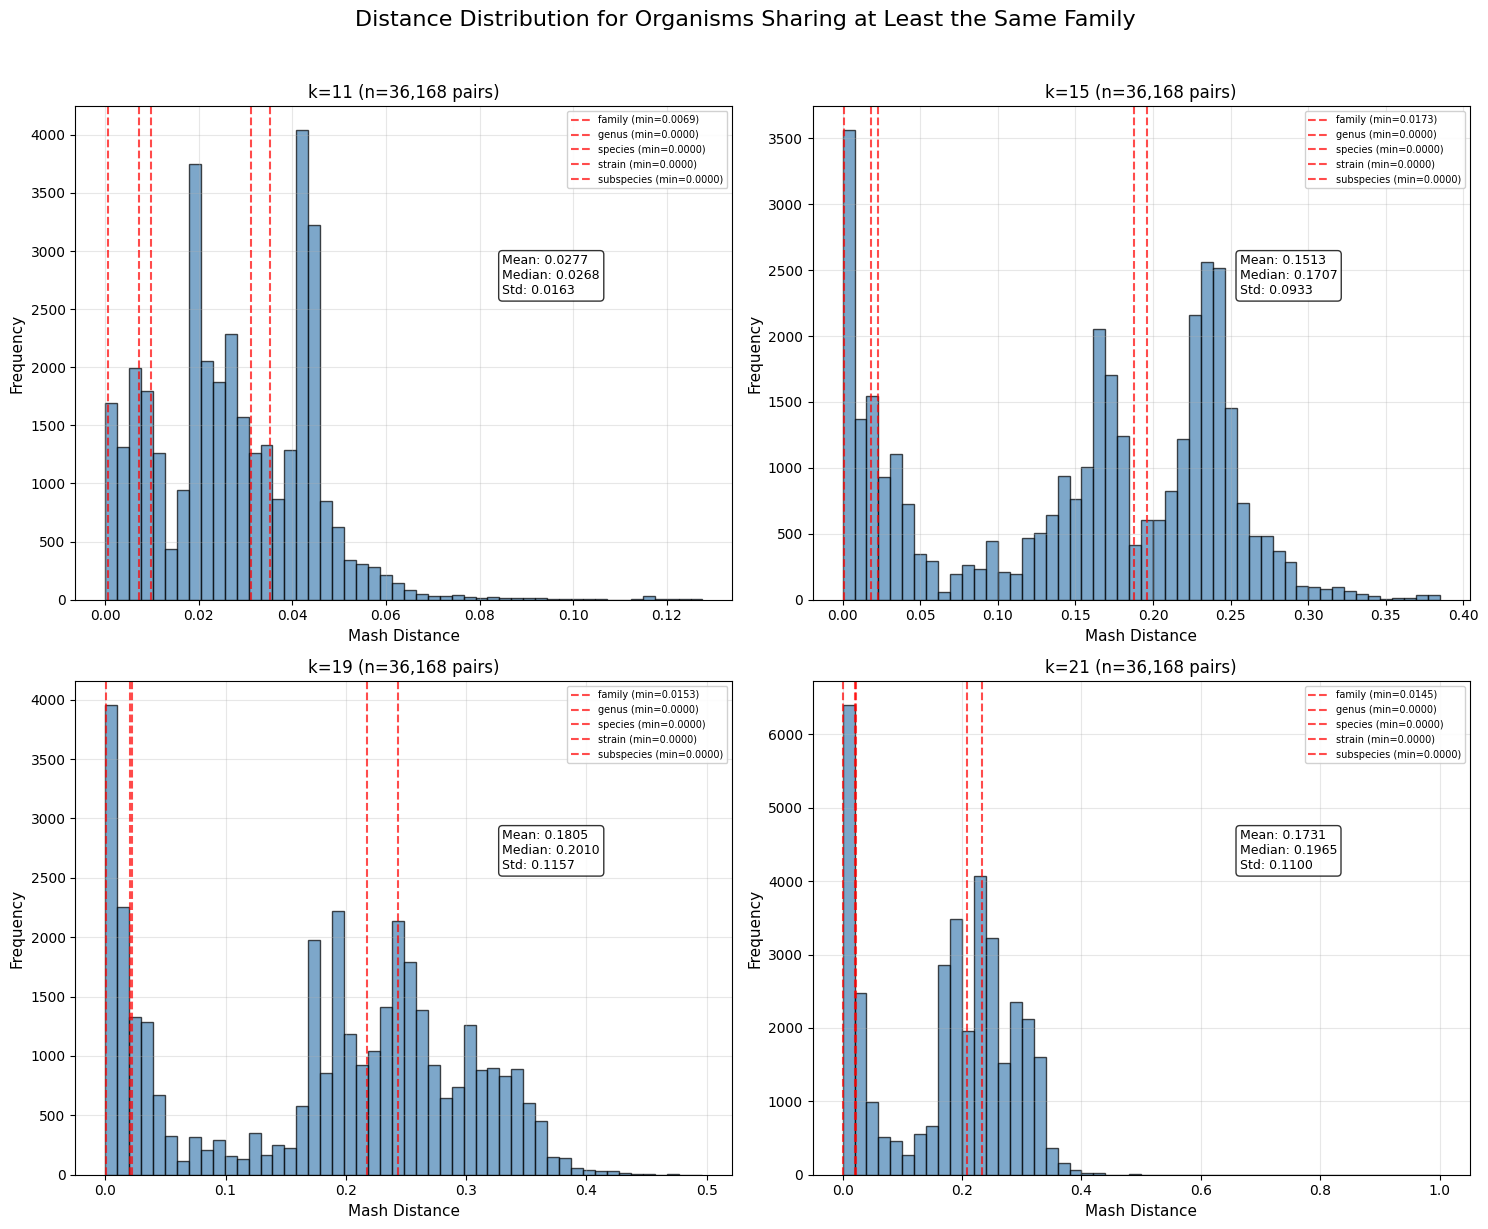


Calculating average distances per taxonomic group...

Average distances per taxonomic group (k=15):
taxonomic_level  n_pairs  mean_distance  median_distance  std_distance  min_distance  max_distance
         family    13064         0.1960           0.1803        0.0612        0.0173        0.3848
          genus    14524         0.1875           0.2186        0.0694        0.0000        0.3676
        species     8035         0.0226           0.0146        0.0296        0.0000        0.3158
         strain       16         0.0009           0.0008        0.0009        0.0000        0.0029
     subspecies      529         0.0185           0.0146        0.0353        0.0000        0.3223


In [97]:
def calculate_average_distances_per_group(pair_data, distance_matrix, org_names):
    """
    Calculate average distances for each taxonomic group (LCA level).
    
    Parameters:
    -----------
    pair_data : list of tuples
        List of (i, j, lca_level) for pairs that share at least the same family
    distance_matrix : pd.DataFrame
        Distance matrix
    org_names : list
        List of organism names (in order matching distance matrix indices)
        
    Returns:
    --------
    pd.DataFrame
        DataFrame with average distances per taxonomic group
    """
    # Group distances by LCA level
    distances_by_level = {}
    
    for i, j, lca_level in pair_data:
        dist = distance_matrix.iloc[i, j]
        if lca_level not in distances_by_level:
            distances_by_level[lca_level] = []
        distances_by_level[lca_level].append(dist)
    
    # Calculate statistics for each level
    results = []
    for level in sorted(distances_by_level.keys()):
        distances = np.array(distances_by_level[level])
        results.append({
            'taxonomic_level': level,
            'n_pairs': len(distances),
            'mean_distance': np.mean(distances),
            'median_distance': np.median(distances),
            'std_distance': np.std(distances),
            'min_distance': np.min(distances),
            'max_distance': np.max(distances)
        })
    
    return pd.DataFrame(results)


def plot_distance_histograms_for_k_values(pair_data, org_names, k_values, bins=50):
    """
    Plot histograms of distances for multiple k values using pre-computed pair data.
    
    Parameters:
    -----------
    pair_data : list of tuples
        List of (i, j, lca_level) for pairs that share at least the same family
    org_names : list
        List of organism names (in order matching distance matrix indices)
    k_values : list of int
        List of k values to plot
    bins : int
        Number of bins for histogram (default: 50)
    """
    n_k_values = len(k_values)
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    fig.suptitle('Distance Distribution for Organisms Sharing at Least the Same Family', 
                 fontsize=16, y=1.02)
    
    # Extract distances for each k value
    all_distances = {}
    
    for idx, k in enumerate(k_values):
        file_path = data_dir / f"distance_matrix_k{k}.csv"
        if not file_path.exists():
            print(f"Warning: File not found for k={k}: {file_path}")
            continue
        
        print(f"Loading distance matrix for k={k}...")
        distance_matrix = load_distance_matrix(file_path)
        
        # Extract distances for the pairs
        distances = []
        for i, j, _ in pair_data:  # Extract i, j from (i, j, lca_level)
            dist = distance_matrix.iloc[i, j]
            distances.append(dist)
        
        distances_array = np.array(distances)
        all_distances[k] = distances_array
        
        # Calculate average distances per group for this k value
        avg_distances_df = calculate_average_distances_per_group(
            pair_data, distance_matrix, org_names
        )
        
        # Plot histogram
        ax = axes[idx]
        ax.hist(distances_array, bins=bins, alpha=0.7, edgecolor='black', color='steelblue')
        ax.set_xlabel('Mash Distance', fontsize=11)
        ax.set_ylabel('Frequency', fontsize=11)
        ax.set_title(f'k={k} (n={len(distances_array):,} pairs)', fontsize=12)
        ax.grid(True, alpha=0.3)
        
        # Add dashed red vertical lines for minimum distance of each taxonomic group
        for _, row in avg_distances_df.iterrows():
            ax.axvline(
                row['mean_distance'], 
                color='red', 
                linestyle='--', 
                linewidth=1.5, 
                alpha=0.7,
                label=f"{row['taxonomic_level']} (min={row['min_distance']:.4f})"
            )
        
        # Add legend for taxonomic groups
        if len(avg_distances_df) > 0:
            ax.legend(loc='upper right', fontsize=7, framealpha=0.9)
        
        # Add statistics text
        stats_text = (f'Mean: {np.mean(distances_array):.4f}\n'
                     f'Median: {np.median(distances_array):.4f}\n'
                     f'Std: {np.std(distances_array):.4f}')
        ax.text(0.65, 0.7, stats_text, transform=ax.transAxes, 
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
               verticalalignment='top', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    return all_distances


# Step 2: Plot histograms for multiple k values
if pair_data is not None:
    k_values_to_plot = [11, 15, 19, 21]
    all_distances = plot_distance_histograms_for_k_values(
        pair_data, 
        org_names, 
        k_values_to_plot, 
        bins=50
    )
    
    # Step 3: Calculate average distances per group for a given k value
    print("\n" + "="*80)
    print("Calculating average distances per taxonomic group...")
    print("="*80)
    
    # Calculate for k=15 as an example
    k_example = 15
    file_path = data_dir / f"distance_matrix_k{k_example}.csv"
    if file_path.exists():
        distance_matrix = load_distance_matrix(file_path)
        avg_distances_df = calculate_average_distances_per_group(
            pair_data, distance_matrix, org_names
        )
        print(f"\nAverage distances per taxonomic group (k={k_example}):")
        print(avg_distances_df.to_string(index=False, float_format='%.4f'))

## Heatmaps

In [ ]:
# Print the head of the distance matrix (k=15)
file_path = data_dir / "distance_matrix_k15.csv"
df = load_distance_matrix(file_path)

Plotting hierarchically clustered heatmaps for k=15 with organism names and genome length...


<Figure size 600x600 with 0 Axes>

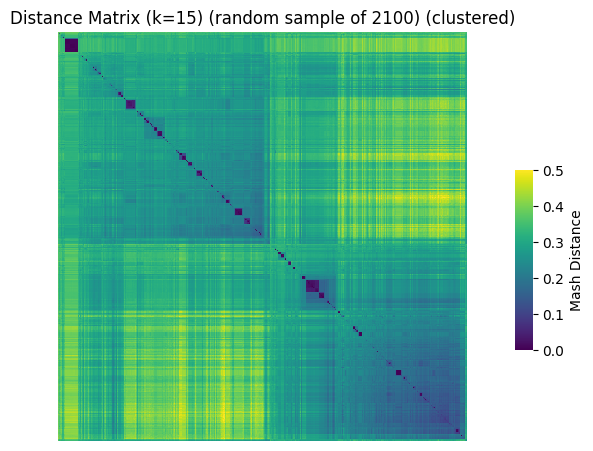

,Staphylococcus_aureus_subsp._aureus_TCH60,Tropheryma_whipplei_str._Twist,Tropheryma_whipplei_TW08_27,Candidatus_Saccharibacteria_bacterium_RAAC3_TM7_1,Candidatus_Saccharimonas_aalborgensis,candidate_division_WWE3_bacterium_RAAC2_WWE3_1,Dehalococcoides_mccartyi_BTF08,Dehalococcoides_sp._CBDB1,Dehalococcoides_mccartyi_DCMB5,Dehalococcoides_ethenogenes_195,...,Prochlorococcus_marinus_str._MIT_9303,Synechococcus_elongatus_PCC_7942,Thermosynechococcus_elongatus_BP-1,Thermosynechococcus_sp._NK55a,Synechococcus_sp._PCC_6312,Synechococcus_sp._PCC_7002,Synechocystis_sp._PCC_6803_substr._PCC-P,Synechocystis_sp._PCC_6803_substr._PCC-N,Synechocystis_sp._PCC_6803_substr._GT-I,Synechocystis_sp._PCC_6803
Staphylococcus_aureus_subsp._aureus_TCH60,0.000000,0.444102,0.445152,0.446218,0.448402,0.436255,0.435337,0.434430,0.425198,0.444102,...,0.434430,0.459231,0.449522,0.446218,0.433536,0.444102,0.425987,0.425987,0.425987,0.425987
Tropheryma_whipplei_str._Twist,0.444102,0.000000,0.003371,0.393899,0.388721,0.392927,0.368564,0.369236,0.373779,0.371643,...,0.359514,0.369575,0.364041,0.364669,0.358645,0.358933,0.362497,0.362497,0.362497,0.362497
Tropheryma_whipplei_TW08_27,0.445152,0.003371,0.000000,0.394390,0.386058,0.391969,0.368899,0.371294,0.374873,0.372348,...,0.360100,0.368564,0.366264,0.364041,0.358071,0.358071,0.364041,0.364041,0.364041,0.364041
Candidatus_Saccharibacteria_bacterium_RAAC3_TM7_1,0.446218,0.393899,0.394390,0.000000,0.316129,0.393411,0.375612,0.380630,0.378267,0.372703,...,0.371643,0.352332,0.368899,0.366588,0.374141,0.360100,0.365302,0.365302,0.365302,0.365302
Candidatus_Saccharimonas_aalborgensis,0.448402,0.388721,0.386058,0.316129,0.000000,0.379045,0.377116,0.375241,0.375241,0.376360,...,0.359223,0.355276,0.362803,0.360989,0.357503,0.349764,0.360395,0.360395,0.360395,0.360395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Synechococcus_sp._PCC_7002,0.444102,0.358933,0.358071,0.360100,0.349764,0.345615,0.327331,0.331403,0.330268,0.337603,...,0.298423,0.267115,0.260093,0.260029,0.263204,0.000000,0.243167,0.243167,0.243167,0.243167
Synechocystis_sp._PCC_6803_substr._PCC-P,0.425987,0.362497,0.364041,0.365302,0.360395,0.346329,0.324865,0.324005,0.324520,0.323495,...,0.300543,0.277630,0.267115,0.265410,0.251506,0.243167,0.000000,0.000002,0.000008,0.000009
Synechocystis_sp._PCC_6803_substr._PCC-N,0.425987,0.362497,0.364041,0.365302,0.360395,0.346329,0.324865,0.324005,0.324520,0.323495,...,0.300543,0.277630,0.267115,0.265410,0.251506,0.243167,0.000002,0.000000,0.000007,0.000008
Synechocystis_sp._PCC_6803_substr._GT-I,0.425987,0.362497,0.364041,0.365302,0.360395,0.346329,0.324865,0.324005,0.324520,0.323495,...,0.300543,0.277630,0.267115,0.265410,0.251506,0.243167,0.000008,0.000007,0.000000,0.000004


In [87]:
# Plot 3: Hierarchically clustered heatmaps of distance matrices
# (show organism names and genome lengths as axis tick labels)

def plot_distance_heatmap_with_labels(
    file_path, 
    title, 
    organism_summary_df=None, 
    genome_length_col="total_sequence_length", 
    max_size=25, 
    method='average', 
    metric='euclidean'
):
    """
    Plot hierarchically clustered heatmap of distance matrix,
    with organism names and genome lengths as tick labels.
    Optionally subsamples the matrix if too large.
    """
    if not file_path.exists():
        print(f"File not found: {file_path}")
        return None

    df = load_distance_matrix(file_path)
    
    # Get normalization range from full matrix (before sampling)
    # Cap colors at 0.5 - values >= 0.5 will all map to the maximum color
    # This ensures consistent colors with histogram plots
    vmin = df.values.min()
    vmax = 0.5  # Cap colors at 0.5

    # Subsample if matrix is too large
    if df.shape[0] > max_size:
        sample_indices = np.random.choice(df.index, max_size, replace=False)
        df_sample = df.loc[sample_indices, sample_indices]
        title += f" (random sample of {max_size})"
    else:
        df_sample = df

    # Hierarchical clustering
    condensed_dist = df_sample.values[np.triu_indices_from(df_sample.values, k=1)]
    if np.all(condensed_dist == 0):
        ordered_indices = np.arange(df_sample.shape[0])
    else:
        linkage_matrix = linkage(condensed_dist, method=method, metric=metric)
        ordered_indices = leaves_list(linkage_matrix)
    df_clustered = df_sample.iloc[ordered_indices, ordered_indices]

    # Set up tick labels with organism and genome length
    clustered_names = df_clustered.index.tolist()
    if organism_summary_df is not None:
        # Defensive fallback if genome length column is not present
        if genome_length_col not in organism_summary_df.columns:
            print(f"Warning: {genome_length_col} column not found. Using names only.")
            tick_labels = [name for name in clustered_names]
        else:
            # Map organism name to genome length from summary dataframe
            organism_summary_df = organism_summary_df.set_index('organism')
            tick_labels = []
            for name in clustered_names:
                # Prefer exact string match, fallback to shortened or mangled names if present
                if name in organism_summary_df.index:
                    length = organism_summary_df.loc[name, genome_length_col]
                else:
                    # fallback: try to match after replacing underscores, or show "?"
                    alt_name = name.replace("_", " ")
                    length_series = organism_summary_df[genome_length_col][organism_summary_df.index.str.replace("_", " ") == alt_name]
                    if len(length_series) > 0:
                        length = length_series.iloc[0]
                    else:
                        length = "?"
                # Safely format integer with ','; otherwise just display as string
                if isinstance(length, (int, float)) and not isinstance(length, bool):
                    try:
                        tick_label = f"{name}\n({int(length):,})"
                    except Exception:
                        tick_label = f"{name}\n({length})"
                else:
                    tick_label = f"{name}\n({length})"
                tick_labels.append(tick_label)

    # Plot heatmap without labels, but make colorbar shorter
    plt.figure(figsize=(6, 6))
    # To make the colorbar shorter, use the ax and cbar_ax of Figure and gridspec
    from matplotlib import gridspec

    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(2, 2, width_ratios=[20, 1], height_ratios=[20, 1], wspace=0.05, hspace=0.15)
    ax = fig.add_subplot(gs[0, 0])
    # Put colorbar axis as a short bar to the right (middle vertical)
    cbar_ax = fig.add_axes([0.905, 0.35, 0.03, 0.3])  # [left, bottom, width, height]

    sns.heatmap(
        df_clustered, 
        cmap='viridis',
        vmin=vmin,
        vmax=vmax,
        cbar=True,
        cbar_kws={'label': 'Mash Distance'},
        cbar_ax=cbar_ax,
        square=True,
        xticklabels=False,
        yticklabels=False,
        ax=ax
    )
    ax.set_title(title + " (clustered)")
    plt.tight_layout(rect=[0, 0, 0.88, 1])  # Leave space for cbar
    plt.show()
    return df_clustered

print("Plotting hierarchically clustered heatmaps for k=15 with organism names and genome length...")

file_path = data_dir / "distance_matrix_k15.csv"
# Pass organism_summary_df if available in the notebook's context
plot_distance_heatmap_with_labels(
    file_path, 
    "Distance Matrix (k=15)",
    organism_summary_df=organism_summary_df if 'organism_summary_df' in locals() else None,
    genome_length_col="merged_total_length",
    max_size=2100,
)

Plotting hierarchically clustered heatmaps for k=15 with organism names and genome length...


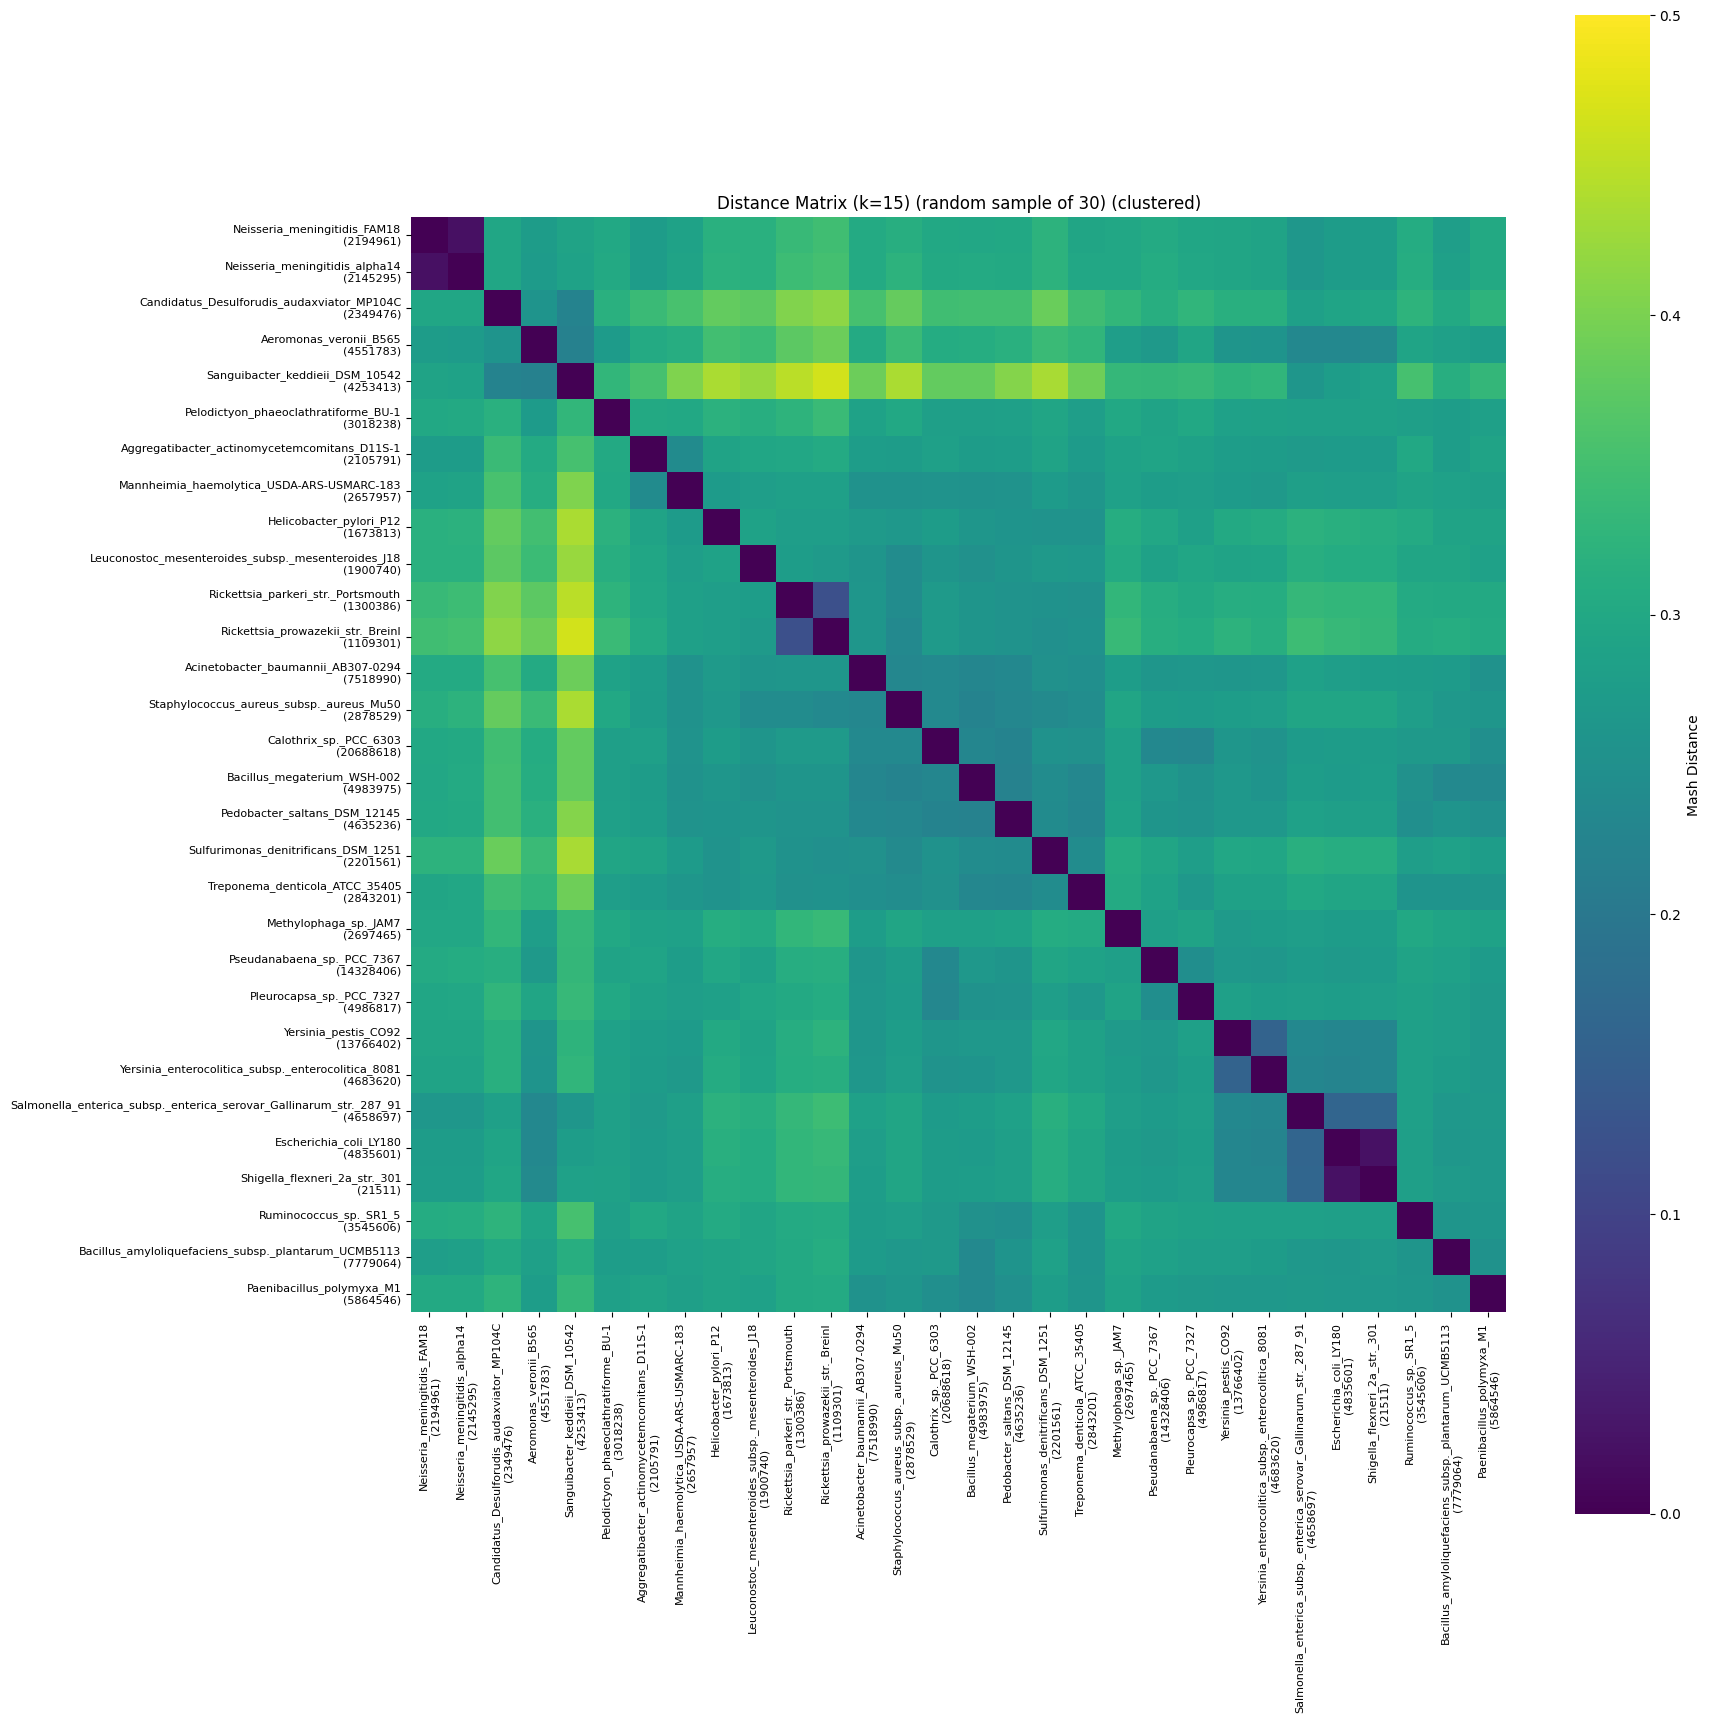

,Neisseria_meningitidis_FAM18,Neisseria_meningitidis_alpha14,Candidatus_Desulforudis_audaxviator_MP104C,Aeromonas_veronii_B565,Sanguibacter_keddieii_DSM_10542,Pelodictyon_phaeoclathratiforme_BU-1,Aggregatibacter_actinomycetemcomitans_D11S-1,Mannheimia_haemolytica_USDA-ARS-USMARC-183,Helicobacter_pylori_P12,Leuconostoc_mesenteroides_subsp._mesenteroides_J18,...,Pseudanabaena_sp._PCC_7367,Pleurocapsa_sp._PCC_7327,Yersinia_pestis_CO92,Yersinia_enterocolitica_subsp._enterocolitica_8081,Salmonella_enterica_subsp._enterica_serovar_Gallinarum_str._287_91,Escherichia_coli_LY180,Shigella_flexneri_2a_str._301,Ruminococcus_sp._SR1_5,Bacillus_amyloliquefaciens_subsp._plantarum_UCMB5113,Paenibacillus_polymyxa_M1
Neisseria_meningitidis_FAM18,0.000000,0.020491,0.296707,0.274254,0.289445,0.300423,0.275387,0.288044,0.317817,0.317198,...,0.303856,0.296482,0.293619,0.289952,0.265060,0.274254,0.277293,0.307211,0.278480,0.300782
Neisseria_meningitidis_alpha14,0.020491,0.000000,0.296594,0.273140,0.289042,0.301023,0.274818,0.289344,0.318599,0.317198,...,0.308549,0.297961,0.293943,0.289647,0.264436,0.275062,0.276541,0.309776,0.281546,0.301507
Candidatus_Desulforudis_audaxviator_MP104C,0.296707,0.296594,0.000000,0.258623,0.224352,0.316585,0.339301,0.354731,0.380630,0.373059,...,0.312732,0.328053,0.315977,0.314482,0.281367,0.291395,0.296369,0.322320,0.301023,0.322989
Aeromonas_veronii_B565,0.274254,0.273140,0.258623,0.000000,0.217166,0.271890,0.302981,0.311874,0.349263,0.340386,...,0.267911,0.293727,0.261136,0.258877,0.233035,0.233678,0.237811,0.291395,0.281725,0.277209
Sanguibacter_keddieii_DSM_10542,0.289445,0.289042,0.224352,0.217166,0.000000,0.329336,0.351811,0.402790,0.437187,0.422888,...,0.331213,0.335134,0.322989,0.326440,0.262799,0.276874,0.285140,0.353388,0.313601,0.331023
Pelodictyon_phaeoclathratiforme_BU-1,0.300423,0.301023,0.316585,0.271890,0.329336,0.000000,0.301023,0.299005,0.320030,0.313021,...,0.290979,0.298888,0.283920,0.285519,0.282905,0.281905,0.285329,0.279689,0.277041,0.281546
Aggregatibacter_actinomycetemcomitans_D11S-1,0.275387,0.274818,0.339301,0.302981,0.351811,0.301023,0.000000,0.238922,0.289243,0.296257,...,0.292657,0.286094,0.276375,0.274899,0.270587,0.271658,0.273219,0.300662,0.275797,0.289749
Mannheimia_haemolytica_USDA-ARS-USMARC-183,0.288044,0.289344,0.354731,0.311874,0.402790,0.299005,0.238922,0.000000,0.272590,0.277799,...,0.276126,0.277630,0.271504,0.268276,0.280214,0.278737,0.278309,0.290259,0.283364,0.280478
Helicobacter_pylori_P12,0.317817,0.318599,0.380630,0.349263,0.437187,0.320030,0.289243,0.272590,0.000000,0.287355,...,0.297617,0.282086,0.301265,0.305900,0.319550,0.315076,0.311732,0.304615,0.289647,0.290773
Leuconostoc_mesenteroides_subsp._mesenteroides_J18,0.317198,0.317198,0.373059,0.340386,0.422888,0.313021,0.296257,0.277799,0.287355,0.000000,...,0.286770,0.295366,0.290670,0.291918,0.312732,0.307610,0.307877,0.294596,0.293943,0.285140


In [72]:
# Plot 3: Hierarchically clustered heatmaps of distance matrices
# (show organism names and genome lengths as axis tick labels)

def plot_distance_heatmap_with_labels(
    file_path, 
    title, 
    organism_summary_df=None, 
    genome_length_col="total_sequence_length", 
    max_size=25, 
    method='average', 
    metric='euclidean'
):
    """
    Plot hierarchically clustered heatmap of distance matrix,
    with organism names and genome lengths as tick labels.
    Optionally subsamples the matrix if too large.
    """
    if not file_path.exists():
        print(f"File not found: {file_path}")
        return None

    df = load_distance_matrix(file_path)
    
    # Get normalization range from full matrix (before sampling)
    # Cap colors at 0.5 - values >= 0.5 will all map to the maximum color
    # This ensures consistent colors with histogram plots
    vmin = df.values.min()
    vmax = 0.5  # Cap colors at 0.5

    # Subsample if matrix is too large
    if df.shape[0] > max_size:
        sample_indices = np.random.choice(df.index, max_size, replace=False)
        df_sample = df.loc[sample_indices, sample_indices]
        title += f" (random sample of {max_size})"
    else:
        df_sample = df

    # Hierarchical clustering
    condensed_dist = df_sample.values[np.triu_indices_from(df_sample.values, k=1)]
    if np.all(condensed_dist == 0):
        ordered_indices = np.arange(df_sample.shape[0])
    else:
        linkage_matrix = linkage(condensed_dist, method=method, metric=metric)
        ordered_indices = leaves_list(linkage_matrix)
    df_clustered = df_sample.iloc[ordered_indices, ordered_indices]

    # Set up tick labels with organism and genome length
    clustered_names = df_clustered.index.tolist()
    if organism_summary_df is not None:
        # Defensive fallback if genome length column is not present
        if genome_length_col not in organism_summary_df.columns:
            print(f"Warning: {genome_length_col} column not found. Using names only.")
            tick_labels = [name for name in clustered_names]
        else:
            # Map organism name to genome length from summary dataframe
            organism_summary_df = organism_summary_df.set_index('organism')
            tick_labels = []
            for name in clustered_names:
                # Prefer exact string match, fallback to shortened or mangled names if present
                if name in organism_summary_df.index:
                    length = organism_summary_df.loc[name, genome_length_col]
                else:
                    # fallback: try to match after replacing underscores, or show "?"
                    alt_name = name.replace("_", " ")
                    length_series = organism_summary_df[genome_length_col][organism_summary_df.index.str.replace("_", " ") == alt_name]
                    if len(length_series) > 0:
                        length = length_series.iloc[0]
                    else:
                        length = "?"
                # Safely format integer with ','; otherwise just display as string
                if isinstance(length, (int, float)) and not isinstance(length, bool):
                    try:
                        tick_label = f"{name}\n({int(length):,})"
                    except Exception:
                        tick_label = f"{name}\n({length})"
                else:
                    tick_label = f"{name}\n({length})"
                tick_labels.append(tick_label)

    # Plot heatmap with labels (show outer labels, rotate for readability)
    plt.figure(figsize=(int(0.4 * df_clustered.shape[0]) + 6, int(0.4 * df_clustered.shape[0]) + 6))
    ax = sns.heatmap(
        df_clustered, 
        cmap='viridis',
        vmin=vmin,
        vmax=vmax,
        cbar_kws={'label': 'Mash Distance'},
        square=True,
        xticklabels=tick_labels,
        yticklabels=tick_labels,
    )

    # Make x/ylabels more readable (rotate, fontsize)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)
    plt.title(title + " (clustered)")
    plt.tight_layout()
    plt.show()
    return df_clustered

print("Plotting hierarchically clustered heatmaps for k=15 with organism names and genome length...")

file_path = data_dir / "distance_matrix_k15.csv"
# Pass organism_summary_df if available in the notebook's context
plot_distance_heatmap_with_labels(
    file_path, 
    "Distance Matrix (k=15)",
    organism_summary_df=organism_summary_df if 'organism_summary_df' in locals() else None,
    genome_length_col="merged_total_length",
    max_size=30,
)

## Scatter

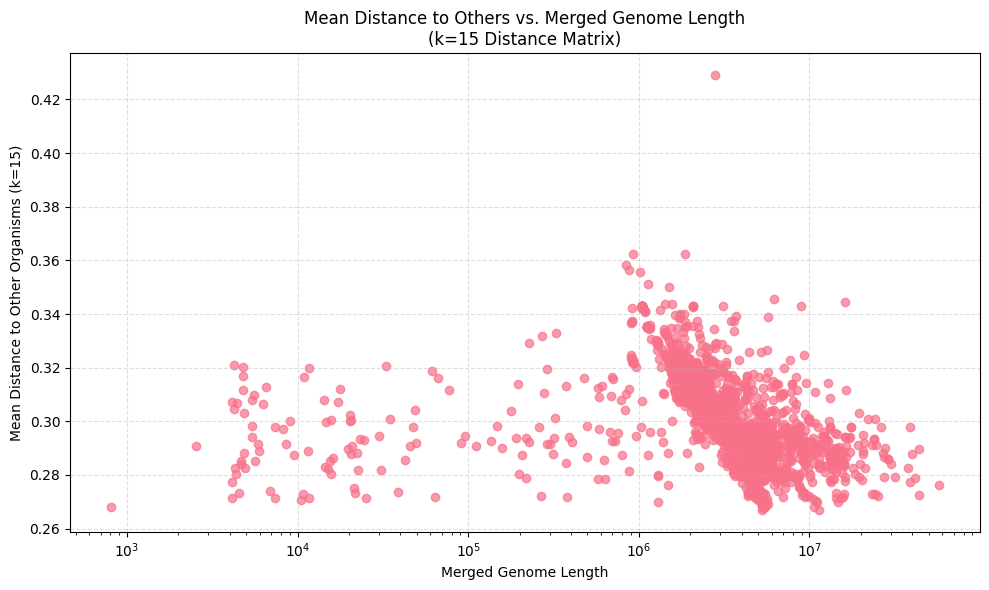

In [14]:
# Compute the mean distance to other organisms for each organism (ignoring self-distance)
dm_k15 = pd.read_csv(data_dir / "distance_matrix_k15.csv", index_col=0)

# Ensure the index and columns are organism names aligned with organism_summary_df
mean_distances = dm_k15.replace(0, np.nan).mean(axis=1)  # Ignore self (0) in mean

# Prepare DataFrame for scatterplot
scatter_df = pd.DataFrame({
    "organism": mean_distances.index,
    "mean_distance_to_others": mean_distances.values
})

if 'organism_summary_df' in locals():
    # Use merged_total_length from organism_summary_df (ensure organism names align)
    length_map = organism_summary_df.set_index("organism")["merged_total_length"]
    scatter_df["merged_total_length"] = scatter_df["organism"].map(length_map)
else:
    scatter_df["merged_total_length"] = np.nan

plt.figure(figsize=(10, 6))
plt.scatter(scatter_df["merged_total_length"], scatter_df["mean_distance_to_others"], alpha=0.7)
plt.xlabel("Merged Genome Length")
plt.xscale("log")
plt.ylabel("Mean Distance to Other Organisms (k=15)")
plt.title("Mean Distance to Others vs. Merged Genome Length\n(k=15 Distance Matrix)")
plt.grid(True, ls="--", alpha=0.4)
plt.tight_layout()
plt.show()


## Interactive Plots with Plotly

In [ ]:
# Define taxonomic levels in hierarchical order
taxonomy_levels = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'subspecies', 'strain']

# Prepare data for sunburst plot
# Build hierarchical structure where each organism contributes to its full taxonomic path
sunburst_records = []

for _, row in organism_taxonomy_df.iterrows():
    # Build the full path from kingdom to deepest level
    path_values = []
    path_ids = []
    
    for i, level in enumerate(taxonomy_levels):
        value = row.get(level, '?')
        # Skip missing or unknown values
        if pd.isna(value) or str(value) == '?' or str(value).strip() == '':
            break
        
        value_str = str(value).strip()
        if value_str:
            # Create unique ID: concatenate all parent levels
            if i == 0:
                current_id = value_str
            else:
                current_id = ' > '.join(path_values + [value_str])
            
            path_values.append(value_str)
            path_ids.append(current_id)
    
    # Only process if we have at least kingdom level
    if len(path_values) > 0:
        # For each level in the path, create a record
        for i, (level, value, path_id) in enumerate(zip(taxonomy_levels[:len(path_values)], path_values, path_ids)):
            parent_id = path_ids[i-1] if i > 0 else ""
            sunburst_records.append({
                'ids': path_id,
                'labels': value,
                'parents': parent_id,
                'level': level
            })

# Convert to DataFrame
sunburst_df = pd.DataFrame(sunburst_records)

# Count organisms at each taxonomic node
# Each organism appears once at each level in its path
# We need to count unique organisms per node
sunburst_counts = sunburst_df.groupby(['ids', 'labels', 'parents', 'level']).size().reset_index(name='count')

# Create sunburst plot
fig = px.sunburst(
    sunburst_counts,
    ids='ids',
    parents='parents',
    values='count',
    names='labels',
    title='Taxonomic Distribution of Organisms (Sunburst Plot)',
    branchvalues='total',
    maxdepth=9  # Show all taxonomic levels
)

# Update layout for better visibility
fig.update_layout(
    width=1000,
    height=1000,
    font_size=12
)

# Save plot (try PNG first, fallback to HTML)
# PNG export requires kaleido with a working browser
try:
    fig.write_image("sunburst_taxonomic_distribution.png", format='png', width=3000, height=3000, scale=1)
    print("✓ Image saved successfully as 'sunburst_taxonomic_distribution.png'")
except Exception as e:
    error_msg = str(e)
    if "browser" in error_msg.lower() or "chrome" in error_msg.lower() or "chromium" in error_msg.lower():
        print("⚠ Could not save PNG image (browser issue with kaleido)")
        print("  Kaleido requires a working Chrome/Chromium browser.")
        print("  You can try: choreo_get_chrome")
        print("  Or use the HTML export below (no browser needed)")
    else:
        print(f"⚠ Could not save PNG image: {error_msg}")
        print("  To save PNG images, ensure kaleido is installed: pip install -U kaleido")
    
    # Fallback: save as HTML (always works, no browser needed)
    try:
        fig.write_html("sunburst_taxonomic_distribution.html")
        print("✓ Saved as interactive HTML: 'sunburst_taxonomic_distribution.html'")
        print("  (You can open this file in a web browser and take a screenshot if needed)")
    except Exception as e2:
        print(f"⚠ Could not save HTML either: {e2}")

fig.show()

# Print summary statistics
print("\nSummary by taxonomic level:")
print("=" * 60)
for level in taxonomy_levels:
    level_data = sunburst_counts[sunburst_counts['level'] == level]
    if len(level_data) > 0:
        total_count = level_data['count'].sum()
        unique_count = len(level_data)
        print(f"{level.capitalize():15s}: {unique_count:5d} unique values, {total_count:6d} total organisms")

Wait expired, Browser is being closed by watchdog.
JSONError decoding message. Ignoring
Traceback (most recent call last):
  File "/zdata/user-data/noam/.conda/envs/python310/lib/python3.10/site-packages/choreographer/channels/_wire.py", line 65, in deserialize
    return simplejson.loads(message)
  File "/zdata/user-data/noam/.conda/envs/python310/lib/python3.10/site-packages/simplejson/__init__.py", line 514, in loads
    return _default_decoder.decode(s)
  File "/zdata/user-data/noam/.conda/envs/python310/lib/python3.10/site-packages/simplejson/decoder.py", line 386, in decode
    obj, end = self.raw_decode(s)
  File "/zdata/user-data/noam/.conda/envs/python310/lib/python3.10/site-packages/simplejson/decoder.py", line 416, in raw_decode
    return self.scan_once(s, idx=_w(s, idx).end())
simplejson.errors.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/zdata/u

⚠ Could not save PNG image (browser issue with kaleido)
  Kaleido requires a working Chrome/Chromium browser.
  You can try: choreo_get_chrome
  Or use the HTML export below (no browser needed)
✓ Saved as interactive HTML: 'sunburst_taxonomic_distribution.html'
  (You can open this file in a web browser and take a screenshot if needed)



Summary by taxonomic level:
Kingdom        :     6 unique values,   2136 total organisms
Phylum         :    38 unique values,   2136 total organisms
Class          :    78 unique values,   2126 total organisms
Order          :   165 unique values,   2122 total organisms
Family         :   336 unique values,   2115 total organisms
Genus          :   671 unique values,   2107 total organisms
Species        :  1025 unique values,   1930 total organisms
Subspecies     :  1042 unique values,   1136 total organisms
Strain         :     2 unique values,      2 total organisms


In [75]:
# 2. Interactive hierarchically-reordered heatmap with plotly (compact version, tiles show organism and length in scientific notation, and taxonomy including family)

def get_names_with_length_and_taxonomy(names, stats_df, taxonomy_df=None):
    """Attach merged_total_length (in scientific notation) and taxonomy info to organism names (including family)."""
    # Pre-process stats_df once
    stats_lookup = None
    stats_fallback = {}  # Normalized key -> value mapping for fallback

    if stats_df is not None:
        if 'organism' in stats_df.columns:
            stats_df = stats_df.set_index('organism')
        stats_lookup = stats_df['merged_total_length'] if 'merged_total_length' in stats_df.columns else None
        # Pre-build fallback lookup (underscore to space conversion)
        if stats_lookup is not None:
            stats_fallback = {str(idx).replace("_", " "): val for idx, val in stats_lookup.items()}

    # Pre-process taxonomy_df once - build multiple lookup dictionaries
    taxonomy_lookup = None
    taxonomy_fallback = {}  # Normalized key -> row mapping for fallback
    taxonomy_info_cache = {}  # Cache for pre-processed taxonomy info

    if taxonomy_df is not None and 'organism_name' in taxonomy_df.columns:
        taxonomy_lookup = taxonomy_df.set_index('organism_name')
        # Pre-build fallback lookup and cache taxonomy info
        for idx, row in taxonomy_lookup.iterrows():
            # Cache taxonomy info for exact match
            taxonomy_info_cache[idx] = {
                'kingdom': row['kingdom'] if pd.notna(row.get('kingdom')) else '?',
                'genus': row.get('genus', '?') if pd.notna(row.get('genus')) else '?',
                'family': row.get('family', '?') if pd.notna(row.get('family')) else '?',
                'species': row['species'] if pd.notna(row.get('species')) else '?',
                'subspecies': row['subspecies'] if pd.notna(row.get('subspecies')) else '?',
                'strain': row['strain'] if pd.notna(row.get('strain')) else '?'
            }
            # Build fallback mapping
            normalized_key = str(idx).replace("_", " ")
            if normalized_key not in taxonomy_fallback:
                taxonomy_fallback[normalized_key] = taxonomy_info_cache[idx]

    def format_sci(val):
        """Format value in scientific notation."""
        try:
            return f"{float(val):.2e}"
        except Exception:
            return str(val)

    def format_taxonomy_string(tax_info):
        """Format taxonomy information into a readable string, including family."""
        parts = []
        if tax_info.get('kingdom', '?') != '?' and pd.notna(tax_info.get('kingdom')):
            parts.append(f"Kingdom: {tax_info['kingdom']}")
        if tax_info.get('family', '?') != '?' and pd.notna(tax_info.get('family')):
            parts.append(f"Family: {tax_info['family']}")
        if tax_info.get('species', '?') != '?' and pd.notna(tax_info.get('species')):
            parts.append(f"Species: {tax_info['species']}")
        if tax_info.get('subspecies', '?') != '?' and pd.notna(tax_info.get('subspecies')):
            parts.append(f"Subspecies: {tax_info['subspecies']}")
        if tax_info.get('strain', '?') != '?' and pd.notna(tax_info.get('strain')):
            parts.append(f"Strain: {tax_info['strain']}")
        return " | ".join(parts) if parts else "Taxonomy: N/A"

    # Batch process all names
    result = []
    default_tax = {'kingdom': '?', 'genus': '?', 'family': '?', 'species': '?', 'subspecies': '?', 'strain': '?'}

    for name in names:
        name_str = str(name)

        # Fast lookup for length
        if stats_lookup is not None:
            if name in stats_lookup.index:
                length = stats_lookup[name]
            else:
                # Fast fallback lookup
                normalized_name = name_str.replace("_", " ")
                length = stats_fallback.get(normalized_name, "NA")
        else:
            length = "NA"

        # Fast lookup for taxonomy
        if taxonomy_lookup is not None:
            if name in taxonomy_info_cache:
                tax_info = taxonomy_info_cache[name]
            else:
                # Fast fallback lookup
                normalized_name = name_str.replace("_", " ")
                tax_info = taxonomy_fallback.get(normalized_name, default_tax)
        else:
            tax_info = default_tax

        # Build label
        label_parts = [f"{name_str} (len={format_sci(length)})"]
        tax_str = format_taxonomy_string(tax_info)
        if tax_str != "Taxonomy: N/A":
            label_parts.append(tax_str)

        result.append("<br>".join(label_parts))

    return result

def create_hierarchical_interactive_heatmap_with_length(
    file_path, title, max_size=100, method='average', metric='euclidean',
    organism_summary_df=None, organism_taxonomy_df=None
):
    # Load Data
    df = pd.read_csv(file_path, index_col=0)

    # Get normalization range from full matrix (before sampling)
    # Cap colors at 0.5 - values >= 0.5 will all map to the maximum color
    zmin = df.values.min()
    zmax = 0.5  # Cap colors at 0.5

    # Subsample if large
    if df.shape[0] > max_size:
        sample_ix = np.random.choice(df.index, max_size, replace=False)
        df = df.loc[sample_ix, sample_ix]
        title += f" (random sample of {max_size})"
    # Symmetrize and cluster
    arr = (df.values + df.values.T) / 2 if not np.allclose(df.values, df.values.T) else df.values
    linkage_mat = linkage(squareform(arr, checks=False), method=method, metric=metric)
    order = leaves_list(linkage_mat)
    df = df.iloc[order, :].iloc[:, order]

    # Pre-build kingdom lookup dictionary (optimized)
    kingdom_lookup = {}
    kingdom_fallback = {}

    if organism_taxonomy_df is not None and 'organism_name' in organism_taxonomy_df.columns:
        taxonomy_lookup = organism_taxonomy_df.set_index('organism_name')
        # Pre-build lookup dictionaries for fast access
        for idx, row in taxonomy_lookup.iterrows():
            kingdom = row['kingdom'] if pd.notna(row.get('kingdom')) else "Unknown"
            kingdom_lookup[idx] = kingdom
            # Build fallback mapping (normalized keys)
            normalized_key = str(idx).replace("_", " ")
            if normalized_key not in kingdom_fallback:
                kingdom_fallback[normalized_key] = kingdom

    # Fast kingdom lookup function
    def get_kingdom_fast(name):
        if name in kingdom_lookup:
            return kingdom_lookup[name]
        # Fast fallback lookup
        normalized_name = str(name).replace("_", " ")
        return kingdom_fallback.get(normalized_name, "Unknown")

    # Get kingdoms for all organisms in one pass (vectorized where possible)
    all_organism_names = list(df.index)
    row_kingdoms = [get_kingdom_fast(name) for name in all_organism_names]
    col_kingdoms = row_kingdoms[:]  # Same organisms in rows and columns

    # Relabel axes with merged_total_length in scientific notation and taxonomy (including family)
    row_names = get_names_with_length_and_taxonomy(df.index, organism_summary_df, organism_taxonomy_df)
    col_names = get_names_with_length_and_taxonomy(df.columns, organism_summary_df, organism_taxonomy_df)

    # Create color mapping for kingdoms (optimized)
    # Note: row_kingdoms and col_kingdoms are the same since rows and columns have same organisms
    unique_kingdoms = sorted(set(row_kingdoms))
    n_kingdoms = len(unique_kingdoms)

    # Use a distinct color palette and extend efficiently if needed
    base_palette = px.colors.qualitative.Set3 if n_kingdoms <= 12 else px.colors.qualitative.Dark24
    extend_palettes = [px.colors.qualitative.Set2, px.colors.qualitative.Pastel1,
                       px.colors.qualitative.Pastel2, px.colors.qualitative.Set1]

    # Extend palette efficiently by concatenating all needed palettes at once
    color_palette = list(base_palette)
    palette_idx = 0
    while len(color_palette) < n_kingdoms:
        color_palette.extend(extend_palettes[palette_idx % len(extend_palettes)])
        palette_idx += 1

    # Create kingdom color mapping (limit to needed size)
    kingdom_colors = {kingdom: color_palette[i] for i, kingdom in enumerate(unique_kingdoms)}

    # Create the heatmap
    fig = go.Figure(go.Heatmap(
        z=df.values, x=col_names, y=row_names,
        zmin=zmin, zmax=zmax,  # Cap colors at 0.5 to match other plots
        colorscale='Viridis', colorbar=dict(title="Mash Distance"), showscale=True,
        hovertemplate='<b>%{y}</b><br><b>%{x}</b><br>Distance: %{z:.4f}<extra></extra>'
    ))

    # Add colored lines for rows (vertical lines on the left side) and columns (horizontal lines on top)
    n_rows = len(row_kingdoms)
    n_cols = len(col_kingdoms)

    # Set dimensions for colored indicators
    row_indicator_width = 0.02  # Width for row indicators on left (as fraction of plot)
    col_indicator_height = 0.02  # Height for column indicators on top (as fraction of plot)

    # Calculate the heatmap domain (leaving space for indicators)
    x_domain_start = row_indicator_width
    x_domain_end = 1.0
    y_domain_start = 0.0
    y_domain_end = 1.0 - col_indicator_height

    # Pre-calculate positions for row and column indicators (vectorized)
    row_height = (y_domain_end - y_domain_start) / n_rows
    col_width = (x_domain_end - x_domain_start) / n_cols

    # Batch create shapes for row indicators (vertical lines on left)
    # Pre-calculate all positions
    row_shapes = []
    for i, kingdom in enumerate(row_kingdoms):
        color = kingdom_colors[kingdom]
        y_bottom = y_domain_end - (i + 1) * row_height
        y_top = y_domain_end - i * row_height
        row_shapes.append(dict(
            type="rect",
            xref="paper", yref="paper",
            x0=0.0, x1=x_domain_start,
            y0=y_bottom, y1=y_top,
            fillcolor=color,
            line=dict(width=0),
            layer="above"
        ))

    # Batch create shapes for column indicators (horizontal lines on top)
    col_shapes = []
    for j, kingdom in enumerate(col_kingdoms):
        color = kingdom_colors[kingdom]
        x_left = x_domain_start + j * col_width
        x_right = x_domain_start + (j + 1) * col_width
        col_shapes.append(dict(
            type="rect",
            xref="paper", yref="paper",
            x0=x_left, x1=x_right,
            y0=y_domain_end, y1=1.0,
            fillcolor=color,
            line=dict(width=0),
            layer="above"
        ))

    # Add all shapes at once (more efficient than individual calls)
    for shape in row_shapes + col_shapes:
        fig.add_shape(**shape)

    # Update layout with adjusted domains to show the colored lines
    fig.update_layout(
        title=title + " (Hierarchically clustered)",
        xaxis_title="Genome/Organism (len, taxonomy)",
        yaxis_title="Genome/Organism (len, taxonomy)",
        width=1000, height=1000,
        xaxis=dict(
            domain=[x_domain_start, x_domain_end],  # Leave space on left for row indicators
            showticklabels=False
        ),
        yaxis=dict(
            domain=[y_domain_start, y_domain_end],  # Leave space on top for column indicators
            showticklabels=False
        )
    )

    fig.show()
    return df

file_path = data_dir / "distance_matrix_k15.csv"
create_hierarchical_interactive_heatmap_with_length(
    file_path, 
    "Interactive Distance Matrix (k=15)", 
    max_size=100,
    organism_summary_df=organism_summary_df if 'organism_summary_df' in locals() else None,
    organism_taxonomy_df=organism_taxonomy_df if 'organism_taxonomy_df' in locals() else None
)

,Candidatus_Saccharimonas_aalborgensis,Treponema_paraluiscuniculi_Cuniculi_A,Synechococcus_elongatus_PCC_7942,Methanosphaerula_palustris_E1-9c,Neisseria_lactamica_020-06,Yersinia_pestis_biovar_Microtus_str._91001,Yersinia_pestis_D182038,Serratia_sp._AS12,Escherichia_blattae_DSM_4481,Enterobacter_cloacae_subsp._cloacae_ATCC_13047,...,Clostridium_difficile_R20291,Clostridium_botulinum_A2_str._Kyoto,Desulfotomaculum_gibsoniae_DSM_7213,Bacteroides_fragilis_638R,Oscillatoria_nigro-viridis_PCC_7112,Bacillus_subtilis_subsp._natto_BEST195,Bacillus_licheniformis_9945A,Paenibacillus_sp._JDR-2,Paenibacillus_polymyxa_SC2,Paenibacillus_polymyxa_M1
Candidatus_Saccharimonas_aalborgensis,0.000000,0.382253,0.355276,0.369575,0.352071,0.346809,0.348024,0.342158,0.357786,0.350524,...,0.348517,0.346809,0.355003,0.346568,0.348765,0.348270,0.341045,0.351036,0.348517,0.349263
Treponema_paraluiscuniculi_Cuniculi_A,0.382253,0.000000,0.357220,0.353654,0.340167,0.345144,0.347292,0.335134,0.342609,0.335134,...,0.360395,0.361288,0.348024,0.352858,0.347536,0.349764,0.338447,0.341934,0.350270,0.349764
Synechococcus_elongatus_PCC_7942,0.355276,0.357220,0.000000,0.294160,0.304615,0.293835,0.293619,0.261729,0.276209,0.273536,...,0.353922,0.358933,0.315226,0.320030,0.256448,0.310329,0.299122,0.284293,0.299474,0.299828
Methanosphaerula_palustris_E1-9c,0.369575,0.353654,0.294160,0.000000,0.325211,0.305126,0.304998,0.274415,0.276375,0.277714,...,0.325385,0.324348,0.303604,0.307610,0.311027,0.308820,0.293511,0.288541,0.302486,0.301023
Neisseria_lactamica_020-06,0.352071,0.340167,0.304615,0.325211,0.000000,0.292550,0.292550,0.252189,0.275797,0.267548,...,0.305900,0.303354,0.289546,0.288541,0.281546,0.286094,0.275469,0.274094,0.297617,0.296707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bacillus_subtilis_subsp._natto_BEST195,0.348270,0.349764,0.310329,0.308820,0.286094,0.274738,0.274576,0.273934,0.282631,0.276044,...,0.240721,0.238550,0.263204,0.259514,0.258057,0.000000,0.204865,0.254521,0.250549,0.252996
Bacillus_licheniformis_9945A,0.341045,0.338447,0.299122,0.293511,0.275469,0.275879,0.276126,0.259835,0.278309,0.260547,...,0.253754,0.251336,0.263680,0.256143,0.258687,0.204865,0.000000,0.241348,0.246229,0.248841
Paenibacillus_sp._JDR-2,0.351036,0.341934,0.284293,0.288541,0.274094,0.266257,0.266756,0.243267,0.260808,0.248191,...,0.283088,0.278139,0.267620,0.256326,0.254284,0.254521,0.241348,0.000000,0.240625,0.239863
Paenibacillus_polymyxa_SC2,0.348517,0.350270,0.299474,0.302486,0.297617,0.266470,0.266399,0.270663,0.279776,0.263680,...,0.238829,0.238133,0.255477,0.251506,0.248084,0.250549,0.246229,0.240625,0.000000,0.006218


In [11]:
# Look for organism pairs with distance == 1 where both organism lengths are >= 0.5e5
from tqdm import tqdm

distance_threshold = 1.0
length_threshold = 0.5e5

# Load the distance matrix and organism summary if not already loaded
distance_matrix = pd.read_csv(file_path, index_col=0)

# We'll use 'merged_total_length' from organism_summary_df.
lengths = organism_summary_df.set_index("organism")["merged_total_length"]

# Find pairs (i, j) where distance == 1 and both lengths >= threshold
organism_pairs = []
index_list = list(distance_matrix.index)
columns_list = list(distance_matrix.columns)

total = len(index_list) * len(columns_list)
progress_bar = tqdm(total=total, desc="Checking organism pairs", leave=False)

for i in index_list:
    for j in columns_list:
        progress_bar.update(1)
        if i == j:
            continue
        dist = distance_matrix.at[i, j]
        len_i = lengths.get(i, 0)
        len_j = lengths.get(j, 0)
        try:
            dval = float(dist)
        except Exception:
            continue
        if dval == distance_threshold and len_i >= length_threshold and len_j >= length_threshold:
            organism_pairs.append({
                "organism_1": i,
                "organism_2": j,
                "distance": dval,
                "len_1": len_i,
                "len_2": len_j
            })
progress_bar.close()

# Convert to DataFrame and display
pairs_df = pd.DataFrame(organism_pairs)
if not pairs_df.empty:
    display(pairs_df)
else:
    print("No pairs with distance==1 and both merged_total_length >= 0.5e5 found.")


,organism_1,organism_2,distance,len_1,len_2
0,Methylobacterium_sp._4-46,Enterococcus_faecalis_V583,1.0,7659055,225592
1,Methylobacterium_sp._4-46,Clostridium_saccharobutylicum_DSM_13864,1.0,7659055,313995
2,Methylobacterium_sp._4-46,Clostridium_cellulovorans_743B,1.0,7659055,156904
3,Methylobacterium_sp._4-46,Enterococcus_faecalis_OG1RF,1.0,7659055,146607
4,Methylobacterium_sp._4-46,Staphylococcus_aureus_subsp._aureus_TCH60,1.0,7659055,2787861
...,...,...,...,...,...
7073,Aliivibrio_salmonicida_LFI1238,Thauera_sp._MZ1T,1.0,9187286,110413
7074,Staphylococcus_lugdunensis_N920143,Thiomonas_sp._3As,1.0,2595888,90340
7075,Staphylococcus_lugdunensis_N920143,Thauera_sp._MZ1T,1.0,2595888,110413
7076,Staphylococcus_lugdunensis_N920143,Streptomyces_avermitilis_MA-4680,1.0,2595888,96131
